In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
df=pd.read_excel("New_Des_Co_10.xlsx",index_col=0)

In [3]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [4]:
dataset.shape

(1056, 30)

In [5]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [6]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [7]:
x1 = df.drop(['Act'],axis=1).astype (float)

In [8]:
y1=df['Act']

In [9]:
x.shape

(1056, 29)

In [10]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [11]:
x1

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Min net atomic charge for a N atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom
Structure,,,,,,,,,,,,,,,,,,,,,
"""24""",112.0,0.0268,0.0179,34926.0,12.2892,1.8436,0.7741,-0.0834,-0.0897,0.1727,...,0.4121,-0.4986,12.3110,0.1616,0.5401,0.9968,0.9632,3.1482,3.1818,0.2886
"""25""",124.0,0.0242,0.0161,45942.0,14.2714,1.7909,0.7153,-0.0834,-0.0897,0.1727,...,0.4035,-0.4863,10.3010,0.1022,0.4260,0.9968,0.9642,3.1685,3.1975,0.3048
"""32""",114.0,0.0351,0.0175,37022.0,12.4635,1.9804,0.7901,-0.0654,-0.0897,0.1727,...,0.4090,-0.4797,8.2613,0.0707,0.4509,0.9968,0.9619,1.3974,2.8002,0.3741
"""33""",115.0,0.0261,0.0174,38082.0,12.6464,1.9074,0.8067,-0.0842,-0.0899,0.1727,...,1.0012,-0.4987,11.9462,0.1445,0.3989,0.9968,0.9635,3.1466,3.1802,0.2864
"""34""",116.0,0.0259,0.0172,39330.0,12.5253,1.9625,0.8124,-0.0840,-0.0899,0.1727,...,1.1716,-0.4984,11.9235,0.1416,0.4177,0.9968,0.9632,3.1479,3.1813,0.2884
"""40""",122.0,0.0246,0.0164,43495.0,13.5387,1.8308,0.7722,-0.0842,-0.0902,0.1727,...,1.0072,-0.4797,9.7466,0.0921,0.1398,0.9968,0.9628,3.1593,3.1905,0.2971
"""41""",111.0,0.0360,0.0180,35648.0,12.2636,1.9636,0.7910,0.0107,-0.0899,0.1727,...,0.4162,-0.4767,7.0761,0.0527,0.1226,0.9967,0.9648,3.2210,3.3081,0.3092
"""42""",112.0,0.0268,0.0179,36690.0,12.3964,1.9074,0.8020,-0.0842,-0.0899,0.1727,...,1.0073,-0.4820,11.0254,0.1248,0.1174,0.9968,0.9631,3.1596,3.1900,0.2972
"""43""",113.0,0.0265,0.0177,37917.0,12.2753,1.9636,0.8076,-0.0840,-0.0899,0.1727,...,1.1763,-0.4821,11.4641,0.1328,0.1430,0.9968,0.9629,3.1612,3.1909,0.2973


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [13]:
x_test.shape

(212, 29)

In [14]:
x_train.shape

(844, 29)

In [15]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [16]:
val_dataset =cb.Pool(x1, y1)

In [17]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [18]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [19]:
regressor.fit(train_dataset)

0:	learn: 0.4619270	total: 196ms	remaining: 3m 15s
1:	learn: 0.4459094	total: 231ms	remaining: 1m 55s
2:	learn: 0.4304716	total: 266ms	remaining: 1m 28s
3:	learn: 0.4136563	total: 292ms	remaining: 1m 12s
4:	learn: 0.4010398	total: 318ms	remaining: 1m 3s
5:	learn: 0.3882465	total: 348ms	remaining: 57.7s
6:	learn: 0.3777918	total: 376ms	remaining: 53.3s
7:	learn: 0.3671684	total: 402ms	remaining: 49.9s
8:	learn: 0.3591872	total: 441ms	remaining: 48.5s
9:	learn: 0.3531076	total: 481ms	remaining: 47.6s
10:	learn: 0.3453521	total: 506ms	remaining: 45.5s
11:	learn: 0.3392027	total: 531ms	remaining: 43.8s
12:	learn: 0.3315906	total: 557ms	remaining: 42.3s
13:	learn: 0.3245489	total: 582ms	remaining: 41s
14:	learn: 0.3190779	total: 607ms	remaining: 39.9s
15:	learn: 0.3141040	total: 633ms	remaining: 39s
16:	learn: 0.3092818	total: 668ms	remaining: 38.7s
17:	learn: 0.3039065	total: 711ms	remaining: 38.8s
18:	learn: 0.2994424	total: 739ms	remaining: 38.1s
19:	learn: 0.2949394	total: 765ms	remaini

163:	learn: 0.1017845	total: 5.75s	remaining: 29.3s
164:	learn: 0.1006724	total: 5.79s	remaining: 29.3s
165:	learn: 0.1002694	total: 5.83s	remaining: 29.3s
166:	learn: 0.0995967	total: 5.88s	remaining: 29.3s
167:	learn: 0.0985221	total: 5.92s	remaining: 29.3s
168:	learn: 0.0978337	total: 5.96s	remaining: 29.3s
169:	learn: 0.0970358	total: 6.01s	remaining: 29.3s
170:	learn: 0.0965868	total: 6.03s	remaining: 29.2s
171:	learn: 0.0959297	total: 6.06s	remaining: 29.2s
172:	learn: 0.0957599	total: 6.09s	remaining: 29.1s
173:	learn: 0.0956442	total: 6.12s	remaining: 29s
174:	learn: 0.0952124	total: 6.15s	remaining: 29s
175:	learn: 0.0946349	total: 6.19s	remaining: 29s
176:	learn: 0.0939265	total: 6.22s	remaining: 28.9s
177:	learn: 0.0931834	total: 6.24s	remaining: 28.8s
178:	learn: 0.0926514	total: 6.27s	remaining: 28.8s
179:	learn: 0.0925442	total: 6.29s	remaining: 28.7s
180:	learn: 0.0920209	total: 6.33s	remaining: 28.6s
181:	learn: 0.0917111	total: 6.36s	remaining: 28.6s
182:	learn: 0.0909

324:	learn: 0.0447034	total: 11.2s	remaining: 23.2s
325:	learn: 0.0445430	total: 11.2s	remaining: 23.2s
326:	learn: 0.0443315	total: 11.2s	remaining: 23.1s
327:	learn: 0.0440854	total: 11.3s	remaining: 23.1s
328:	learn: 0.0437574	total: 11.3s	remaining: 23.1s
329:	learn: 0.0435762	total: 11.3s	remaining: 23s
330:	learn: 0.0433877	total: 11.4s	remaining: 23.1s
331:	learn: 0.0430510	total: 11.4s	remaining: 23s
332:	learn: 0.0427638	total: 11.5s	remaining: 23s
333:	learn: 0.0425411	total: 11.5s	remaining: 22.9s
334:	learn: 0.0425223	total: 11.6s	remaining: 22.9s
335:	learn: 0.0423346	total: 11.6s	remaining: 22.9s
336:	learn: 0.0422094	total: 11.6s	remaining: 22.9s
337:	learn: 0.0421459	total: 11.6s	remaining: 22.8s
338:	learn: 0.0418757	total: 11.7s	remaining: 22.8s
339:	learn: 0.0416825	total: 11.7s	remaining: 22.7s
340:	learn: 0.0414928	total: 11.7s	remaining: 22.7s
341:	learn: 0.0414271	total: 11.8s	remaining: 22.6s
342:	learn: 0.0413218	total: 11.8s	remaining: 22.6s
343:	learn: 0.0409

488:	learn: 0.0225299	total: 16.2s	remaining: 16.9s
489:	learn: 0.0224081	total: 16.2s	remaining: 16.9s
490:	learn: 0.0223531	total: 16.2s	remaining: 16.8s
491:	learn: 0.0222960	total: 16.2s	remaining: 16.8s
492:	learn: 0.0222243	total: 16.3s	remaining: 16.7s
493:	learn: 0.0221681	total: 16.3s	remaining: 16.7s
494:	learn: 0.0221389	total: 16.3s	remaining: 16.7s
495:	learn: 0.0220885	total: 16.4s	remaining: 16.6s
496:	learn: 0.0220231	total: 16.4s	remaining: 16.6s
497:	learn: 0.0218810	total: 16.4s	remaining: 16.6s
498:	learn: 0.0218207	total: 16.5s	remaining: 16.5s
499:	learn: 0.0217425	total: 16.5s	remaining: 16.5s
500:	learn: 0.0217238	total: 16.5s	remaining: 16.4s
501:	learn: 0.0217042	total: 16.5s	remaining: 16.4s
502:	learn: 0.0216572	total: 16.6s	remaining: 16.4s
503:	learn: 0.0215595	total: 16.6s	remaining: 16.3s
504:	learn: 0.0215197	total: 16.6s	remaining: 16.3s
505:	learn: 0.0214554	total: 16.7s	remaining: 16.3s
506:	learn: 0.0213629	total: 16.7s	remaining: 16.2s
507:	learn: 

650:	learn: 0.0140193	total: 20.9s	remaining: 11.2s
651:	learn: 0.0139704	total: 20.9s	remaining: 11.2s
652:	learn: 0.0139660	total: 21s	remaining: 11.1s
653:	learn: 0.0139239	total: 21s	remaining: 11.1s
654:	learn: 0.0139070	total: 21s	remaining: 11.1s
655:	learn: 0.0138709	total: 21.1s	remaining: 11s
656:	learn: 0.0138545	total: 21.1s	remaining: 11s
657:	learn: 0.0138384	total: 21.1s	remaining: 11s
658:	learn: 0.0137842	total: 21.2s	remaining: 11s
659:	learn: 0.0137553	total: 21.2s	remaining: 10.9s
660:	learn: 0.0137338	total: 21.2s	remaining: 10.9s
661:	learn: 0.0136589	total: 21.3s	remaining: 10.9s
662:	learn: 0.0136467	total: 21.3s	remaining: 10.8s
663:	learn: 0.0135998	total: 21.3s	remaining: 10.8s
664:	learn: 0.0135756	total: 21.4s	remaining: 10.8s
665:	learn: 0.0135201	total: 21.4s	remaining: 10.7s
666:	learn: 0.0135098	total: 21.4s	remaining: 10.7s
667:	learn: 0.0135049	total: 21.4s	remaining: 10.7s
668:	learn: 0.0135025	total: 21.4s	remaining: 10.6s
669:	learn: 0.0134669	tota

810:	learn: 0.0103890	total: 25.6s	remaining: 5.98s
811:	learn: 0.0103759	total: 25.7s	remaining: 5.94s
812:	learn: 0.0103600	total: 25.7s	remaining: 5.91s
813:	learn: 0.0103467	total: 25.7s	remaining: 5.88s
814:	learn: 0.0103278	total: 25.7s	remaining: 5.84s
815:	learn: 0.0103153	total: 25.8s	remaining: 5.81s
816:	learn: 0.0102929	total: 25.8s	remaining: 5.78s
817:	learn: 0.0102908	total: 25.9s	remaining: 5.75s
818:	learn: 0.0102834	total: 25.9s	remaining: 5.72s
819:	learn: 0.0102824	total: 25.9s	remaining: 5.69s
820:	learn: 0.0102673	total: 25.9s	remaining: 5.66s
821:	learn: 0.0102403	total: 26s	remaining: 5.62s
822:	learn: 0.0102307	total: 26s	remaining: 5.59s
823:	learn: 0.0102216	total: 26s	remaining: 5.56s
824:	learn: 0.0102118	total: 26s	remaining: 5.53s
825:	learn: 0.0101997	total: 26.1s	remaining: 5.49s
826:	learn: 0.0101902	total: 26.1s	remaining: 5.46s
827:	learn: 0.0101788	total: 26.1s	remaining: 5.43s
828:	learn: 0.0101774	total: 26.2s	remaining: 5.4s
829:	learn: 0.0101698

972:	learn: 0.0089220	total: 30.4s	remaining: 843ms
973:	learn: 0.0089178	total: 30.4s	remaining: 812ms
974:	learn: 0.0089105	total: 30.4s	remaining: 781ms
975:	learn: 0.0089014	total: 30.5s	remaining: 749ms
976:	learn: 0.0088951	total: 30.5s	remaining: 718ms
977:	learn: 0.0088846	total: 30.5s	remaining: 687ms
978:	learn: 0.0088768	total: 30.6s	remaining: 656ms
979:	learn: 0.0088752	total: 30.6s	remaining: 625ms
980:	learn: 0.0088705	total: 30.6s	remaining: 593ms
981:	learn: 0.0088625	total: 30.7s	remaining: 562ms
982:	learn: 0.0088570	total: 30.7s	remaining: 531ms
983:	learn: 0.0088517	total: 30.7s	remaining: 499ms
984:	learn: 0.0088467	total: 30.7s	remaining: 468ms
985:	learn: 0.0088419	total: 30.8s	remaining: 437ms
986:	learn: 0.0088415	total: 30.8s	remaining: 406ms
987:	learn: 0.0088378	total: 30.8s	remaining: 374ms
988:	learn: 0.0088300	total: 30.9s	remaining: 343ms
989:	learn: 0.0088235	total: 30.9s	remaining: 312ms
990:	learn: 0.0088175	total: 30.9s	remaining: 281ms
991:	learn: 

In [20]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:37.125000


In [21]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612


In [22]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [23]:
y_pred

array([ 1.25405607e-01,  3.48545741e-01,  1.22198572e-01,  7.55708736e-01,
        2.10420442e-01,  8.50059045e-01,  3.84752766e-01,  2.52894885e-01,
        7.30690370e-01,  8.57664757e-03,  7.08262276e-01,  3.83046341e-01,
        6.66985094e-01,  6.85269933e-01,  5.62000801e-01,  1.31172808e-01,
        1.09683989e+00,  9.04892224e-01,  1.40165760e+00,  8.74380920e-01,
        8.09898392e-01,  1.08260546e-01,  4.65050665e-02,  5.93417975e-01,
        1.15580887e-01,  1.72211091e-01,  8.22605867e-02,  6.37989910e-01,
        2.02616593e+00,  5.49251397e-01,  6.73905639e-01,  1.07814857e+00,
        5.00991635e-01,  1.41990746e-01,  2.42869116e-01,  4.21678959e-01,
        9.67534427e-01,  1.48308090e+00,  2.50852116e-02,  1.23022904e-01,
        6.10796111e-01,  2.16306133e-01,  7.12792355e-01,  2.22647187e-01,
        2.44870750e-01,  1.18427169e+00,  1.23325368e-01,  1.03979006e+00,
        4.62561143e-01,  9.88766781e-01,  2.00857152e-01,  1.63538725e-01,
        5.25477421e-01,  

In [24]:
y_pred_train = regressor.predict(x_train)

In [25]:
y_pred1=regressor.predict(x1)

In [26]:
y_pred1

array([0.86946254, 0.71661568, 0.62838005, 0.89777191, 0.89577715,
       0.79126432, 0.69029494, 0.85305132, 0.8653223 , 0.81367039])

In [27]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [28]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [29]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.14418257767877313
MSE is 0.04337478977825152
R2 score is 0.8338643654511465


In [30]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [31]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0031030219980917365
MSE is 7.696190785875361e-05
R2 score is 0.9996667520333224


In [32]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

0:	learn: 0.4701165	total: 38.4ms	remaining: 38.4s
1:	learn: 0.4540595	total: 78.5ms	remaining: 39.2s
2:	learn: 0.4393889	total: 121ms	remaining: 40.3s
3:	learn: 0.4230607	total: 153ms	remaining: 38.1s
4:	learn: 0.4103808	total: 186ms	remaining: 37s
5:	learn: 0.4000346	total: 218ms	remaining: 36.1s
6:	learn: 0.3894729	total: 270ms	remaining: 38.4s
7:	learn: 0.3795497	total: 305ms	remaining: 37.8s
8:	learn: 0.3723463	total: 336ms	remaining: 37s
9:	learn: 0.3631357	total: 371ms	remaining: 36.8s
10:	learn: 0.3539189	total: 402ms	remaining: 36.1s
11:	learn: 0.3473158	total: 435ms	remaining: 35.8s
12:	learn: 0.3392223	total: 466ms	remaining: 35.4s
13:	learn: 0.3318623	total: 521ms	remaining: 36.7s
14:	learn: 0.3271689	total: 554ms	remaining: 36.4s
15:	learn: 0.3208621	total: 597ms	remaining: 36.7s
16:	learn: 0.3155370	total: 633ms	remaining: 36.6s
17:	learn: 0.3098398	total: 665ms	remaining: 36.3s
18:	learn: 0.3066052	total: 700ms	remaining: 36.1s
19:	learn: 0.3016920	total: 764ms	remaining

166:	learn: 0.1018454	total: 5.98s	remaining: 29.8s
167:	learn: 0.1005931	total: 6.02s	remaining: 29.8s
168:	learn: 0.0999439	total: 6.05s	remaining: 29.8s
169:	learn: 0.0996084	total: 6.08s	remaining: 29.7s
170:	learn: 0.0984956	total: 6.13s	remaining: 29.7s
171:	learn: 0.0978354	total: 6.17s	remaining: 29.7s
172:	learn: 0.0974918	total: 6.21s	remaining: 29.7s
173:	learn: 0.0972878	total: 6.24s	remaining: 29.6s
174:	learn: 0.0962017	total: 6.26s	remaining: 29.5s
175:	learn: 0.0954078	total: 6.29s	remaining: 29.4s
176:	learn: 0.0952932	total: 6.31s	remaining: 29.4s
177:	learn: 0.0950584	total: 6.34s	remaining: 29.3s
178:	learn: 0.0942789	total: 6.36s	remaining: 29.2s
179:	learn: 0.0941725	total: 6.39s	remaining: 29.1s
180:	learn: 0.0935143	total: 6.42s	remaining: 29s
181:	learn: 0.0931702	total: 6.45s	remaining: 29s
182:	learn: 0.0930288	total: 6.49s	remaining: 29s
183:	learn: 0.0924900	total: 6.52s	remaining: 28.9s
184:	learn: 0.0923244	total: 6.55s	remaining: 28.9s
185:	learn: 0.0917

327:	learn: 0.0417204	total: 11.2s	remaining: 22.9s
328:	learn: 0.0413978	total: 11.2s	remaining: 22.8s
329:	learn: 0.0411532	total: 11.2s	remaining: 22.8s
330:	learn: 0.0409644	total: 11.2s	remaining: 22.7s
331:	learn: 0.0406511	total: 11.3s	remaining: 22.7s
332:	learn: 0.0403525	total: 11.3s	remaining: 22.7s
333:	learn: 0.0401845	total: 11.4s	remaining: 22.7s
334:	learn: 0.0401272	total: 11.4s	remaining: 22.7s
335:	learn: 0.0399850	total: 11.4s	remaining: 22.6s
336:	learn: 0.0397425	total: 11.5s	remaining: 22.6s
337:	learn: 0.0396044	total: 11.5s	remaining: 22.6s
338:	learn: 0.0392397	total: 11.5s	remaining: 22.5s
339:	learn: 0.0391647	total: 11.6s	remaining: 22.5s
340:	learn: 0.0389400	total: 11.6s	remaining: 22.4s
341:	learn: 0.0386664	total: 11.6s	remaining: 22.4s
342:	learn: 0.0384364	total: 11.7s	remaining: 22.3s
343:	learn: 0.0381933	total: 11.7s	remaining: 22.3s
344:	learn: 0.0379846	total: 11.7s	remaining: 22.3s
345:	learn: 0.0379159	total: 11.8s	remaining: 22.2s
346:	learn: 

490:	learn: 0.0181608	total: 16.6s	remaining: 17.2s
491:	learn: 0.0180871	total: 16.6s	remaining: 17.2s
492:	learn: 0.0179731	total: 16.6s	remaining: 17.1s
493:	learn: 0.0178753	total: 16.7s	remaining: 17.1s
494:	learn: 0.0178189	total: 16.7s	remaining: 17.1s
495:	learn: 0.0178052	total: 16.8s	remaining: 17s
496:	learn: 0.0177063	total: 16.8s	remaining: 17s
497:	learn: 0.0175707	total: 16.8s	remaining: 17s
498:	learn: 0.0174705	total: 16.9s	remaining: 16.9s
499:	learn: 0.0174441	total: 16.9s	remaining: 16.9s
500:	learn: 0.0173578	total: 16.9s	remaining: 16.9s
501:	learn: 0.0173360	total: 17s	remaining: 16.8s
502:	learn: 0.0172495	total: 17s	remaining: 16.8s
503:	learn: 0.0171232	total: 17s	remaining: 16.8s
504:	learn: 0.0169796	total: 17.1s	remaining: 16.7s
505:	learn: 0.0168519	total: 17.1s	remaining: 16.7s
506:	learn: 0.0168136	total: 17.1s	remaining: 16.7s
507:	learn: 0.0167325	total: 17.2s	remaining: 16.6s
508:	learn: 0.0166409	total: 17.2s	remaining: 16.6s
509:	learn: 0.0165855	to

649:	learn: 0.0093672	total: 22.3s	remaining: 12s
650:	learn: 0.0093544	total: 22.3s	remaining: 12s
651:	learn: 0.0093221	total: 22.3s	remaining: 11.9s
652:	learn: 0.0092754	total: 22.4s	remaining: 11.9s
653:	learn: 0.0092340	total: 22.4s	remaining: 11.8s
654:	learn: 0.0092171	total: 22.4s	remaining: 11.8s
655:	learn: 0.0091630	total: 22.4s	remaining: 11.8s
656:	learn: 0.0091155	total: 22.5s	remaining: 11.7s
657:	learn: 0.0090353	total: 22.5s	remaining: 11.7s
658:	learn: 0.0090176	total: 22.5s	remaining: 11.7s
659:	learn: 0.0089970	total: 22.6s	remaining: 11.6s
660:	learn: 0.0089592	total: 22.6s	remaining: 11.6s
661:	learn: 0.0089086	total: 22.6s	remaining: 11.5s
662:	learn: 0.0088911	total: 22.6s	remaining: 11.5s
663:	learn: 0.0088859	total: 22.7s	remaining: 11.5s
664:	learn: 0.0088547	total: 22.7s	remaining: 11.4s
665:	learn: 0.0088087	total: 22.7s	remaining: 11.4s
666:	learn: 0.0087830	total: 22.7s	remaining: 11.4s
667:	learn: 0.0087749	total: 22.8s	remaining: 11.3s
668:	learn: 0.00

811:	learn: 0.0050266	total: 27.2s	remaining: 6.3s
812:	learn: 0.0050031	total: 27.2s	remaining: 6.27s
813:	learn: 0.0049725	total: 27.3s	remaining: 6.23s
814:	learn: 0.0049695	total: 27.3s	remaining: 6.2s
815:	learn: 0.0049577	total: 27.3s	remaining: 6.16s
816:	learn: 0.0049280	total: 27.4s	remaining: 6.13s
817:	learn: 0.0048997	total: 27.4s	remaining: 6.09s
818:	learn: 0.0048857	total: 27.4s	remaining: 6.06s
819:	learn: 0.0048699	total: 27.4s	remaining: 6.02s
820:	learn: 0.0048595	total: 27.5s	remaining: 5.99s
821:	learn: 0.0048492	total: 27.5s	remaining: 5.96s
822:	learn: 0.0048223	total: 27.5s	remaining: 5.92s
823:	learn: 0.0048077	total: 27.6s	remaining: 5.89s
824:	learn: 0.0047807	total: 27.6s	remaining: 5.86s
825:	learn: 0.0047730	total: 27.6s	remaining: 5.82s
826:	learn: 0.0047349	total: 27.7s	remaining: 5.79s
827:	learn: 0.0047180	total: 27.7s	remaining: 5.76s
828:	learn: 0.0046706	total: 27.7s	remaining: 5.72s
829:	learn: 0.0046489	total: 27.8s	remaining: 5.69s
830:	learn: 0.

971:	learn: 0.0027915	total: 32.3s	remaining: 929ms
972:	learn: 0.0027808	total: 32.3s	remaining: 896ms
973:	learn: 0.0027701	total: 32.3s	remaining: 863ms
974:	learn: 0.0027634	total: 32.4s	remaining: 830ms
975:	learn: 0.0027537	total: 32.4s	remaining: 797ms
976:	learn: 0.0027484	total: 32.5s	remaining: 764ms
977:	learn: 0.0027327	total: 32.5s	remaining: 731ms
978:	learn: 0.0027299	total: 32.5s	remaining: 698ms
979:	learn: 0.0027249	total: 32.6s	remaining: 665ms
980:	learn: 0.0027112	total: 32.6s	remaining: 631ms
981:	learn: 0.0027018	total: 32.6s	remaining: 598ms
982:	learn: 0.0026909	total: 32.7s	remaining: 565ms
983:	learn: 0.0026833	total: 32.7s	remaining: 531ms
984:	learn: 0.0026621	total: 32.7s	remaining: 498ms
985:	learn: 0.0026414	total: 32.7s	remaining: 465ms
986:	learn: 0.0026344	total: 32.8s	remaining: 432ms
987:	learn: 0.0026251	total: 32.8s	remaining: 398ms
988:	learn: 0.0026119	total: 32.8s	remaining: 365ms
989:	learn: 0.0025982	total: 32.9s	remaining: 332ms
990:	learn: 

139:	learn: 0.1133757	total: 4.42s	remaining: 27.2s
140:	learn: 0.1125450	total: 4.45s	remaining: 27.1s
141:	learn: 0.1116697	total: 4.47s	remaining: 27s
142:	learn: 0.1102651	total: 4.5s	remaining: 27s
143:	learn: 0.1088419	total: 4.54s	remaining: 27s
144:	learn: 0.1079359	total: 4.58s	remaining: 27s
145:	learn: 0.1072930	total: 4.61s	remaining: 27s
146:	learn: 0.1066161	total: 4.66s	remaining: 27s
147:	learn: 0.1053853	total: 4.68s	remaining: 27s
148:	learn: 0.1050376	total: 4.71s	remaining: 26.9s
149:	learn: 0.1048405	total: 4.74s	remaining: 26.8s
150:	learn: 0.1047766	total: 4.76s	remaining: 26.8s
151:	learn: 0.1042858	total: 4.79s	remaining: 26.7s
152:	learn: 0.1032820	total: 4.81s	remaining: 26.6s
153:	learn: 0.1031959	total: 4.83s	remaining: 26.6s
154:	learn: 0.1019965	total: 4.86s	remaining: 26.5s
155:	learn: 0.1015583	total: 4.89s	remaining: 26.5s
156:	learn: 0.1014094	total: 4.92s	remaining: 26.4s
157:	learn: 0.1002814	total: 4.95s	remaining: 26.4s
158:	learn: 0.0991593	total

304:	learn: 0.0432285	total: 9.38s	remaining: 21.4s
305:	learn: 0.0428862	total: 9.4s	remaining: 21.3s
306:	learn: 0.0425747	total: 9.43s	remaining: 21.3s
307:	learn: 0.0425402	total: 9.47s	remaining: 21.3s
308:	learn: 0.0422614	total: 9.5s	remaining: 21.2s
309:	learn: 0.0421534	total: 9.53s	remaining: 21.2s
310:	learn: 0.0418553	total: 9.56s	remaining: 21.2s
311:	learn: 0.0417414	total: 9.59s	remaining: 21.1s
312:	learn: 0.0414757	total: 9.62s	remaining: 21.1s
313:	learn: 0.0412336	total: 9.65s	remaining: 21.1s
314:	learn: 0.0410488	total: 9.67s	remaining: 21s
315:	learn: 0.0409941	total: 9.7s	remaining: 21s
316:	learn: 0.0409377	total: 9.73s	remaining: 21s
317:	learn: 0.0406723	total: 9.77s	remaining: 21s
318:	learn: 0.0403777	total: 9.8s	remaining: 20.9s
319:	learn: 0.0399754	total: 9.83s	remaining: 20.9s
320:	learn: 0.0399668	total: 9.85s	remaining: 20.8s
321:	learn: 0.0399541	total: 9.88s	remaining: 20.8s
322:	learn: 0.0396818	total: 9.91s	remaining: 20.8s
323:	learn: 0.0396722	to

467:	learn: 0.0215219	total: 14.1s	remaining: 16s
468:	learn: 0.0213586	total: 14.1s	remaining: 16s
469:	learn: 0.0213013	total: 14.2s	remaining: 16s
470:	learn: 0.0212893	total: 14.2s	remaining: 15.9s
471:	learn: 0.0212169	total: 14.2s	remaining: 15.9s
472:	learn: 0.0211650	total: 14.2s	remaining: 15.9s
473:	learn: 0.0210430	total: 14.3s	remaining: 15.8s
474:	learn: 0.0209538	total: 14.3s	remaining: 15.8s
475:	learn: 0.0209493	total: 14.3s	remaining: 15.8s
476:	learn: 0.0209380	total: 14.4s	remaining: 15.7s
477:	learn: 0.0209300	total: 14.4s	remaining: 15.7s
478:	learn: 0.0208559	total: 14.4s	remaining: 15.7s
479:	learn: 0.0207173	total: 14.4s	remaining: 15.6s
480:	learn: 0.0206426	total: 14.5s	remaining: 15.6s
481:	learn: 0.0206219	total: 14.5s	remaining: 15.6s
482:	learn: 0.0206175	total: 14.5s	remaining: 15.6s
483:	learn: 0.0205646	total: 14.6s	remaining: 15.5s
484:	learn: 0.0205172	total: 14.6s	remaining: 15.5s
485:	learn: 0.0205057	total: 14.6s	remaining: 15.5s
486:	learn: 0.0204

632:	learn: 0.0135460	total: 18.9s	remaining: 10.9s
633:	learn: 0.0135432	total: 18.9s	remaining: 10.9s
634:	learn: 0.0135391	total: 18.9s	remaining: 10.9s
635:	learn: 0.0134868	total: 18.9s	remaining: 10.8s
636:	learn: 0.0134785	total: 19s	remaining: 10.8s
637:	learn: 0.0134749	total: 19s	remaining: 10.8s
638:	learn: 0.0134413	total: 19s	remaining: 10.8s
639:	learn: 0.0133964	total: 19.1s	remaining: 10.7s
640:	learn: 0.0133801	total: 19.1s	remaining: 10.7s
641:	learn: 0.0133749	total: 19.1s	remaining: 10.7s
642:	learn: 0.0133719	total: 19.2s	remaining: 10.6s
643:	learn: 0.0133700	total: 19.2s	remaining: 10.6s
644:	learn: 0.0133386	total: 19.2s	remaining: 10.6s
645:	learn: 0.0133292	total: 19.2s	remaining: 10.5s
646:	learn: 0.0133031	total: 19.3s	remaining: 10.5s
647:	learn: 0.0132644	total: 19.3s	remaining: 10.5s
648:	learn: 0.0132615	total: 19.3s	remaining: 10.5s
649:	learn: 0.0132524	total: 19.4s	remaining: 10.4s
650:	learn: 0.0132101	total: 19.4s	remaining: 10.4s
651:	learn: 0.0131

792:	learn: 0.0104609	total: 23.4s	remaining: 6.1s
793:	learn: 0.0104462	total: 23.4s	remaining: 6.07s
794:	learn: 0.0104405	total: 23.4s	remaining: 6.04s
795:	learn: 0.0104390	total: 23.5s	remaining: 6.01s
796:	learn: 0.0104210	total: 23.5s	remaining: 5.98s
797:	learn: 0.0104111	total: 23.5s	remaining: 5.95s
798:	learn: 0.0103995	total: 23.5s	remaining: 5.92s
799:	learn: 0.0103962	total: 23.6s	remaining: 5.89s
800:	learn: 0.0103876	total: 23.6s	remaining: 5.86s
801:	learn: 0.0103729	total: 23.6s	remaining: 5.83s
802:	learn: 0.0103581	total: 23.7s	remaining: 5.8s
803:	learn: 0.0103479	total: 23.7s	remaining: 5.77s
804:	learn: 0.0103330	total: 23.7s	remaining: 5.74s
805:	learn: 0.0103213	total: 23.7s	remaining: 5.71s
806:	learn: 0.0103111	total: 23.8s	remaining: 5.68s
807:	learn: 0.0103017	total: 23.8s	remaining: 5.65s
808:	learn: 0.0102997	total: 23.8s	remaining: 5.62s
809:	learn: 0.0102904	total: 23.8s	remaining: 5.59s
810:	learn: 0.0102757	total: 23.9s	remaining: 5.56s
811:	learn: 0.

957:	learn: 0.0094588	total: 28.1s	remaining: 1.23s
958:	learn: 0.0094530	total: 28.1s	remaining: 1.2s
959:	learn: 0.0094493	total: 28.1s	remaining: 1.17s
960:	learn: 0.0094484	total: 28.2s	remaining: 1.14s
961:	learn: 0.0094402	total: 28.2s	remaining: 1.11s
962:	learn: 0.0094359	total: 28.2s	remaining: 1.08s
963:	learn: 0.0094345	total: 28.3s	remaining: 1.05s
964:	learn: 0.0094293	total: 28.3s	remaining: 1.03s
965:	learn: 0.0094239	total: 28.3s	remaining: 997ms
966:	learn: 0.0094193	total: 28.3s	remaining: 967ms
967:	learn: 0.0094145	total: 28.4s	remaining: 938ms
968:	learn: 0.0094125	total: 28.4s	remaining: 908ms
969:	learn: 0.0094097	total: 28.4s	remaining: 879ms
970:	learn: 0.0094060	total: 28.4s	remaining: 849ms
971:	learn: 0.0094026	total: 28.5s	remaining: 820ms
972:	learn: 0.0094019	total: 28.5s	remaining: 791ms
973:	learn: 0.0093994	total: 28.5s	remaining: 762ms
974:	learn: 0.0093985	total: 28.6s	remaining: 732ms
975:	learn: 0.0093973	total: 28.6s	remaining: 703ms
976:	learn: 0

118:	learn: 0.1331492	total: 3.6s	remaining: 26.6s
119:	learn: 0.1316861	total: 3.63s	remaining: 26.6s
120:	learn: 0.1314017	total: 3.67s	remaining: 26.6s
121:	learn: 0.1301067	total: 3.7s	remaining: 26.6s
122:	learn: 0.1293607	total: 3.72s	remaining: 26.6s
123:	learn: 0.1281527	total: 3.75s	remaining: 26.5s
124:	learn: 0.1263299	total: 3.79s	remaining: 26.5s
125:	learn: 0.1250922	total: 3.82s	remaining: 26.5s
126:	learn: 0.1240209	total: 3.85s	remaining: 26.5s
127:	learn: 0.1227793	total: 3.87s	remaining: 26.4s
128:	learn: 0.1224893	total: 3.9s	remaining: 26.3s
129:	learn: 0.1214049	total: 3.92s	remaining: 26.3s
130:	learn: 0.1200517	total: 3.95s	remaining: 26.2s
131:	learn: 0.1186400	total: 3.98s	remaining: 26.2s
132:	learn: 0.1180554	total: 4s	remaining: 26.1s
133:	learn: 0.1170394	total: 4.03s	remaining: 26s
134:	learn: 0.1162584	total: 4.06s	remaining: 26s
135:	learn: 0.1159701	total: 4.08s	remaining: 26s
136:	learn: 0.1157671	total: 4.11s	remaining: 25.9s
137:	learn: 0.1156634	to

277:	learn: 0.0489563	total: 8.31s	remaining: 21.6s
278:	learn: 0.0487494	total: 8.34s	remaining: 21.6s
279:	learn: 0.0483966	total: 8.37s	remaining: 21.5s
280:	learn: 0.0482583	total: 8.4s	remaining: 21.5s
281:	learn: 0.0480857	total: 8.44s	remaining: 21.5s
282:	learn: 0.0479753	total: 8.47s	remaining: 21.5s
283:	learn: 0.0477169	total: 8.5s	remaining: 21.4s
284:	learn: 0.0473923	total: 8.54s	remaining: 21.4s
285:	learn: 0.0471810	total: 8.56s	remaining: 21.4s
286:	learn: 0.0469999	total: 8.6s	remaining: 21.4s
287:	learn: 0.0465445	total: 8.62s	remaining: 21.3s
288:	learn: 0.0464838	total: 8.65s	remaining: 21.3s
289:	learn: 0.0462492	total: 8.67s	remaining: 21.2s
290:	learn: 0.0462287	total: 8.7s	remaining: 21.2s
291:	learn: 0.0461191	total: 8.72s	remaining: 21.1s
292:	learn: 0.0460532	total: 8.76s	remaining: 21.1s
293:	learn: 0.0457093	total: 8.79s	remaining: 21.1s
294:	learn: 0.0456572	total: 8.82s	remaining: 21.1s
295:	learn: 0.0453739	total: 8.85s	remaining: 21s
296:	learn: 0.0453

441:	learn: 0.0232324	total: 13.3s	remaining: 16.7s
442:	learn: 0.0230499	total: 13.3s	remaining: 16.7s
443:	learn: 0.0229717	total: 13.3s	remaining: 16.7s
444:	learn: 0.0228481	total: 13.4s	remaining: 16.7s
445:	learn: 0.0227308	total: 13.4s	remaining: 16.6s
446:	learn: 0.0225911	total: 13.4s	remaining: 16.6s
447:	learn: 0.0225161	total: 13.5s	remaining: 16.6s
448:	learn: 0.0224246	total: 13.5s	remaining: 16.6s
449:	learn: 0.0223242	total: 13.5s	remaining: 16.6s
450:	learn: 0.0222155	total: 13.6s	remaining: 16.5s
451:	learn: 0.0221592	total: 13.6s	remaining: 16.5s
452:	learn: 0.0220310	total: 13.6s	remaining: 16.5s
453:	learn: 0.0219021	total: 13.6s	remaining: 16.4s
454:	learn: 0.0217727	total: 13.7s	remaining: 16.4s
455:	learn: 0.0217006	total: 13.7s	remaining: 16.3s
456:	learn: 0.0215636	total: 13.7s	remaining: 16.3s
457:	learn: 0.0215124	total: 13.8s	remaining: 16.3s
458:	learn: 0.0214204	total: 13.8s	remaining: 16.3s
459:	learn: 0.0213995	total: 13.8s	remaining: 16.2s
460:	learn: 

601:	learn: 0.0137569	total: 18.4s	remaining: 12.2s
602:	learn: 0.0137380	total: 18.4s	remaining: 12.1s
603:	learn: 0.0137358	total: 18.5s	remaining: 12.1s
604:	learn: 0.0136917	total: 18.5s	remaining: 12.1s
605:	learn: 0.0136760	total: 18.5s	remaining: 12s
606:	learn: 0.0136382	total: 18.6s	remaining: 12s
607:	learn: 0.0136010	total: 18.6s	remaining: 12s
608:	learn: 0.0135677	total: 18.6s	remaining: 11.9s
609:	learn: 0.0135619	total: 18.6s	remaining: 11.9s
610:	learn: 0.0135425	total: 18.7s	remaining: 11.9s
611:	learn: 0.0134939	total: 18.7s	remaining: 11.8s
612:	learn: 0.0134803	total: 18.7s	remaining: 11.8s
613:	learn: 0.0134431	total: 18.7s	remaining: 11.8s
614:	learn: 0.0134333	total: 18.8s	remaining: 11.7s
615:	learn: 0.0133933	total: 18.8s	remaining: 11.7s
616:	learn: 0.0133633	total: 18.8s	remaining: 11.7s
617:	learn: 0.0133509	total: 18.9s	remaining: 11.7s
618:	learn: 0.0133055	total: 18.9s	remaining: 11.6s
619:	learn: 0.0132744	total: 18.9s	remaining: 11.6s
620:	learn: 0.0132

766:	learn: 0.0103840	total: 23.3s	remaining: 7.09s
767:	learn: 0.0103691	total: 23.4s	remaining: 7.06s
768:	learn: 0.0103650	total: 23.4s	remaining: 7.03s
769:	learn: 0.0103617	total: 23.4s	remaining: 7s
770:	learn: 0.0103574	total: 23.5s	remaining: 6.97s
771:	learn: 0.0103494	total: 23.5s	remaining: 6.94s
772:	learn: 0.0103403	total: 23.5s	remaining: 6.91s
773:	learn: 0.0103334	total: 23.6s	remaining: 6.89s
774:	learn: 0.0103184	total: 23.6s	remaining: 6.86s
775:	learn: 0.0103092	total: 23.7s	remaining: 6.83s
776:	learn: 0.0102963	total: 23.7s	remaining: 6.8s
777:	learn: 0.0102940	total: 23.7s	remaining: 6.77s
778:	learn: 0.0102820	total: 23.7s	remaining: 6.74s
779:	learn: 0.0102717	total: 23.8s	remaining: 6.71s
780:	learn: 0.0102553	total: 23.8s	remaining: 6.67s
781:	learn: 0.0102452	total: 23.8s	remaining: 6.64s
782:	learn: 0.0102394	total: 23.9s	remaining: 6.61s
783:	learn: 0.0102324	total: 23.9s	remaining: 6.58s
784:	learn: 0.0102198	total: 23.9s	remaining: 6.55s
785:	learn: 0.01

930:	learn: 0.0094019	total: 28.1s	remaining: 2.08s
931:	learn: 0.0093987	total: 28.1s	remaining: 2.05s
932:	learn: 0.0093974	total: 28.2s	remaining: 2.02s
933:	learn: 0.0093957	total: 28.2s	remaining: 1.99s
934:	learn: 0.0093914	total: 28.2s	remaining: 1.96s
935:	learn: 0.0093877	total: 28.3s	remaining: 1.93s
936:	learn: 0.0093857	total: 28.3s	remaining: 1.9s
937:	learn: 0.0093831	total: 28.3s	remaining: 1.87s
938:	learn: 0.0093780	total: 28.4s	remaining: 1.84s
939:	learn: 0.0093728	total: 28.4s	remaining: 1.81s
940:	learn: 0.0093684	total: 28.4s	remaining: 1.78s
941:	learn: 0.0093666	total: 28.4s	remaining: 1.75s
942:	learn: 0.0093657	total: 28.4s	remaining: 1.72s
943:	learn: 0.0093630	total: 28.5s	remaining: 1.69s
944:	learn: 0.0093616	total: 28.5s	remaining: 1.66s
945:	learn: 0.0093600	total: 28.5s	remaining: 1.63s
946:	learn: 0.0093568	total: 28.6s	remaining: 1.6s
947:	learn: 0.0093525	total: 28.6s	remaining: 1.57s
948:	learn: 0.0093508	total: 28.6s	remaining: 1.54s
949:	learn: 0.

97:	learn: 0.1464381	total: 3.05s	remaining: 28s
98:	learn: 0.1452165	total: 3.08s	remaining: 28s
99:	learn: 0.1438761	total: 3.15s	remaining: 28.4s
100:	learn: 0.1428163	total: 3.18s	remaining: 28.3s
101:	learn: 0.1424462	total: 3.21s	remaining: 28.2s
102:	learn: 0.1421971	total: 3.23s	remaining: 28.1s
103:	learn: 0.1410711	total: 3.27s	remaining: 28.1s
104:	learn: 0.1395290	total: 3.29s	remaining: 28s
105:	learn: 0.1383848	total: 3.32s	remaining: 28s
106:	learn: 0.1369600	total: 3.34s	remaining: 27.9s
107:	learn: 0.1367501	total: 3.37s	remaining: 27.8s
108:	learn: 0.1352300	total: 3.39s	remaining: 27.7s
109:	learn: 0.1336015	total: 3.42s	remaining: 27.6s
110:	learn: 0.1323630	total: 3.44s	remaining: 27.6s
111:	learn: 0.1319474	total: 3.48s	remaining: 27.6s
112:	learn: 0.1303780	total: 3.5s	remaining: 27.5s
113:	learn: 0.1299163	total: 3.53s	remaining: 27.4s
114:	learn: 0.1296170	total: 3.55s	remaining: 27.4s
115:	learn: 0.1292783	total: 3.58s	remaining: 27.3s
116:	learn: 0.1280840	to

257:	learn: 0.0531961	total: 7.99s	remaining: 23s
258:	learn: 0.0531405	total: 8.02s	remaining: 22.9s
259:	learn: 0.0530181	total: 8.05s	remaining: 22.9s
260:	learn: 0.0525976	total: 8.08s	remaining: 22.9s
261:	learn: 0.0524228	total: 8.11s	remaining: 22.8s
262:	learn: 0.0523382	total: 8.15s	remaining: 22.8s
263:	learn: 0.0520692	total: 8.18s	remaining: 22.8s
264:	learn: 0.0514736	total: 8.22s	remaining: 22.8s
265:	learn: 0.0511362	total: 8.26s	remaining: 22.8s
266:	learn: 0.0507529	total: 8.28s	remaining: 22.7s
267:	learn: 0.0505986	total: 8.31s	remaining: 22.7s
268:	learn: 0.0503599	total: 8.34s	remaining: 22.7s
269:	learn: 0.0501190	total: 8.37s	remaining: 22.6s
270:	learn: 0.0500508	total: 8.4s	remaining: 22.6s
271:	learn: 0.0496600	total: 8.43s	remaining: 22.5s
272:	learn: 0.0494949	total: 8.46s	remaining: 22.5s
273:	learn: 0.0492924	total: 8.49s	remaining: 22.5s
274:	learn: 0.0489643	total: 8.52s	remaining: 22.5s
275:	learn: 0.0487070	total: 8.54s	remaining: 22.4s
276:	learn: 0.0

419:	learn: 0.0249811	total: 13.2s	remaining: 18.2s
420:	learn: 0.0249248	total: 13.2s	remaining: 18.2s
421:	learn: 0.0248187	total: 13.3s	remaining: 18.2s
422:	learn: 0.0247334	total: 13.3s	remaining: 18.1s
423:	learn: 0.0246354	total: 13.3s	remaining: 18.1s
424:	learn: 0.0245058	total: 13.4s	remaining: 18.1s
425:	learn: 0.0244753	total: 13.4s	remaining: 18s
426:	learn: 0.0244494	total: 13.4s	remaining: 18s
427:	learn: 0.0243117	total: 13.4s	remaining: 18s
428:	learn: 0.0242578	total: 13.5s	remaining: 17.9s
429:	learn: 0.0241840	total: 13.5s	remaining: 17.9s
430:	learn: 0.0240529	total: 13.5s	remaining: 17.9s
431:	learn: 0.0238220	total: 13.6s	remaining: 17.8s
432:	learn: 0.0236799	total: 13.6s	remaining: 17.8s
433:	learn: 0.0236190	total: 13.6s	remaining: 17.7s
434:	learn: 0.0235355	total: 13.6s	remaining: 17.7s
435:	learn: 0.0233403	total: 13.7s	remaining: 17.7s
436:	learn: 0.0232715	total: 13.7s	remaining: 17.7s
437:	learn: 0.0231687	total: 13.7s	remaining: 17.6s
438:	learn: 0.0230

583:	learn: 0.0143111	total: 18.7s	remaining: 13.3s
584:	learn: 0.0142812	total: 18.8s	remaining: 13.3s
585:	learn: 0.0142431	total: 18.8s	remaining: 13.3s
586:	learn: 0.0142414	total: 18.8s	remaining: 13.2s
587:	learn: 0.0142073	total: 18.8s	remaining: 13.2s
588:	learn: 0.0141704	total: 18.9s	remaining: 13.2s
589:	learn: 0.0141141	total: 18.9s	remaining: 13.1s
590:	learn: 0.0140601	total: 19s	remaining: 13.1s
591:	learn: 0.0140546	total: 19s	remaining: 13.1s
592:	learn: 0.0140427	total: 19s	remaining: 13.1s
593:	learn: 0.0140049	total: 19s	remaining: 13s
594:	learn: 0.0139845	total: 19.1s	remaining: 13s
595:	learn: 0.0139469	total: 19.1s	remaining: 12.9s
596:	learn: 0.0139321	total: 19.1s	remaining: 12.9s
597:	learn: 0.0138761	total: 19.2s	remaining: 12.9s
598:	learn: 0.0138347	total: 19.2s	remaining: 12.8s
599:	learn: 0.0138041	total: 19.2s	remaining: 12.8s
600:	learn: 0.0137724	total: 19.2s	remaining: 12.8s
601:	learn: 0.0137455	total: 19.3s	remaining: 12.7s
602:	learn: 0.0136745	to

744:	learn: 0.0106369	total: 23.6s	remaining: 8.06s
745:	learn: 0.0106360	total: 23.6s	remaining: 8.04s
746:	learn: 0.0106289	total: 23.6s	remaining: 8s
747:	learn: 0.0106042	total: 23.7s	remaining: 7.97s
748:	learn: 0.0105900	total: 23.7s	remaining: 7.94s
749:	learn: 0.0105891	total: 23.7s	remaining: 7.91s
750:	learn: 0.0105728	total: 23.7s	remaining: 7.87s
751:	learn: 0.0105618	total: 23.8s	remaining: 7.84s
752:	learn: 0.0105412	total: 23.8s	remaining: 7.81s
753:	learn: 0.0105239	total: 23.8s	remaining: 7.77s
754:	learn: 0.0105086	total: 23.8s	remaining: 7.74s
755:	learn: 0.0104992	total: 23.9s	remaining: 7.71s
756:	learn: 0.0104894	total: 23.9s	remaining: 7.67s
757:	learn: 0.0104797	total: 23.9s	remaining: 7.64s
758:	learn: 0.0104705	total: 24s	remaining: 7.61s
759:	learn: 0.0104591	total: 24s	remaining: 7.58s
760:	learn: 0.0104376	total: 24s	remaining: 7.54s
761:	learn: 0.0104245	total: 24s	remaining: 7.51s
762:	learn: 0.0104128	total: 24.1s	remaining: 7.47s
763:	learn: 0.0104057	t

905:	learn: 0.0095144	total: 28.5s	remaining: 2.96s
906:	learn: 0.0095125	total: 28.6s	remaining: 2.93s
907:	learn: 0.0095119	total: 28.6s	remaining: 2.9s
908:	learn: 0.0095114	total: 28.6s	remaining: 2.87s
909:	learn: 0.0095083	total: 28.7s	remaining: 2.83s
910:	learn: 0.0095042	total: 28.7s	remaining: 2.8s
911:	learn: 0.0095032	total: 28.7s	remaining: 2.77s
912:	learn: 0.0094996	total: 28.7s	remaining: 2.74s
913:	learn: 0.0094969	total: 28.8s	remaining: 2.71s
914:	learn: 0.0094926	total: 28.8s	remaining: 2.67s
915:	learn: 0.0094888	total: 28.8s	remaining: 2.64s
916:	learn: 0.0094837	total: 28.8s	remaining: 2.61s
917:	learn: 0.0094793	total: 28.9s	remaining: 2.58s
918:	learn: 0.0094763	total: 28.9s	remaining: 2.55s
919:	learn: 0.0094738	total: 28.9s	remaining: 2.51s
920:	learn: 0.0094691	total: 28.9s	remaining: 2.48s
921:	learn: 0.0094662	total: 29s	remaining: 2.45s
922:	learn: 0.0094642	total: 29s	remaining: 2.42s
923:	learn: 0.0094602	total: 29s	remaining: 2.39s
924:	learn: 0.009454

70:	learn: 0.1776316	total: 2.07s	remaining: 27.1s
71:	learn: 0.1762000	total: 2.1s	remaining: 27.1s
72:	learn: 0.1750553	total: 2.14s	remaining: 27.1s
73:	learn: 0.1738332	total: 2.17s	remaining: 27.1s
74:	learn: 0.1720065	total: 2.19s	remaining: 27.1s
75:	learn: 0.1700437	total: 2.22s	remaining: 27s
76:	learn: 0.1681480	total: 2.25s	remaining: 26.9s
77:	learn: 0.1672135	total: 2.27s	remaining: 26.9s
78:	learn: 0.1668990	total: 2.31s	remaining: 26.9s
79:	learn: 0.1644639	total: 2.33s	remaining: 26.8s
80:	learn: 0.1641449	total: 2.36s	remaining: 26.7s
81:	learn: 0.1620738	total: 2.38s	remaining: 26.7s
82:	learn: 0.1615504	total: 2.4s	remaining: 26.6s
83:	learn: 0.1612693	total: 2.43s	remaining: 26.5s
84:	learn: 0.1597816	total: 2.46s	remaining: 26.4s
85:	learn: 0.1582701	total: 2.48s	remaining: 26.4s
86:	learn: 0.1563070	total: 2.52s	remaining: 26.4s
87:	learn: 0.1551216	total: 2.54s	remaining: 26.3s
88:	learn: 0.1527409	total: 2.56s	remaining: 26.3s
89:	learn: 0.1518368	total: 2.59s	r

231:	learn: 0.0599534	total: 6.57s	remaining: 21.8s
232:	learn: 0.0593560	total: 6.6s	remaining: 21.7s
233:	learn: 0.0592362	total: 6.64s	remaining: 21.7s
234:	learn: 0.0585833	total: 6.67s	remaining: 21.7s
235:	learn: 0.0583904	total: 6.7s	remaining: 21.7s
236:	learn: 0.0579818	total: 6.72s	remaining: 21.6s
237:	learn: 0.0572292	total: 6.75s	remaining: 21.6s
238:	learn: 0.0570387	total: 6.78s	remaining: 21.6s
239:	learn: 0.0565081	total: 6.81s	remaining: 21.6s
240:	learn: 0.0564114	total: 6.83s	remaining: 21.5s
241:	learn: 0.0561158	total: 6.86s	remaining: 21.5s
242:	learn: 0.0559490	total: 6.88s	remaining: 21.4s
243:	learn: 0.0557610	total: 6.91s	remaining: 21.4s
244:	learn: 0.0556153	total: 6.93s	remaining: 21.4s
245:	learn: 0.0550487	total: 6.96s	remaining: 21.3s
246:	learn: 0.0546645	total: 6.98s	remaining: 21.3s
247:	learn: 0.0545812	total: 7.02s	remaining: 21.3s
248:	learn: 0.0544644	total: 7.04s	remaining: 21.2s
249:	learn: 0.0543327	total: 7.07s	remaining: 21.2s
250:	learn: 0.

392:	learn: 0.0268706	total: 11.1s	remaining: 17.1s
393:	learn: 0.0266994	total: 11.1s	remaining: 17.1s
394:	learn: 0.0265368	total: 11.1s	remaining: 17.1s
395:	learn: 0.0264955	total: 11.2s	remaining: 17s
396:	learn: 0.0262897	total: 11.2s	remaining: 17s
397:	learn: 0.0261491	total: 11.2s	remaining: 17s
398:	learn: 0.0259936	total: 11.3s	remaining: 16.9s
399:	learn: 0.0259398	total: 11.3s	remaining: 16.9s
400:	learn: 0.0257815	total: 11.3s	remaining: 16.9s
401:	learn: 0.0256978	total: 11.3s	remaining: 16.9s
402:	learn: 0.0255964	total: 11.4s	remaining: 16.8s
403:	learn: 0.0254697	total: 11.4s	remaining: 16.8s
404:	learn: 0.0252474	total: 11.4s	remaining: 16.8s
405:	learn: 0.0251080	total: 11.4s	remaining: 16.7s
406:	learn: 0.0250122	total: 11.5s	remaining: 16.7s
407:	learn: 0.0247965	total: 11.5s	remaining: 16.7s
408:	learn: 0.0247788	total: 11.5s	remaining: 16.6s
409:	learn: 0.0246464	total: 11.5s	remaining: 16.6s
410:	learn: 0.0246269	total: 11.6s	remaining: 16.6s
411:	learn: 0.0244

557:	learn: 0.0129507	total: 15.7s	remaining: 12.4s
558:	learn: 0.0129153	total: 15.7s	remaining: 12.4s
559:	learn: 0.0129111	total: 15.8s	remaining: 12.4s
560:	learn: 0.0128461	total: 15.8s	remaining: 12.4s
561:	learn: 0.0128360	total: 15.8s	remaining: 12.3s
562:	learn: 0.0127348	total: 15.9s	remaining: 12.3s
563:	learn: 0.0126378	total: 15.9s	remaining: 12.3s
564:	learn: 0.0126324	total: 15.9s	remaining: 12.2s
565:	learn: 0.0126294	total: 15.9s	remaining: 12.2s
566:	learn: 0.0126158	total: 16s	remaining: 12.2s
567:	learn: 0.0125754	total: 16s	remaining: 12.2s
568:	learn: 0.0125573	total: 16s	remaining: 12.1s
569:	learn: 0.0124990	total: 16s	remaining: 12.1s
570:	learn: 0.0124953	total: 16.1s	remaining: 12.1s
571:	learn: 0.0124327	total: 16.1s	remaining: 12s
572:	learn: 0.0123908	total: 16.1s	remaining: 12s
573:	learn: 0.0123166	total: 16.2s	remaining: 12s
574:	learn: 0.0122207	total: 16.2s	remaining: 12s
575:	learn: 0.0121511	total: 16.2s	remaining: 11.9s
576:	learn: 0.0120774	total:

717:	learn: 0.0068808	total: 20.2s	remaining: 7.94s
718:	learn: 0.0068177	total: 20.3s	remaining: 7.91s
719:	learn: 0.0067590	total: 20.3s	remaining: 7.89s
720:	learn: 0.0067562	total: 20.3s	remaining: 7.86s
721:	learn: 0.0067143	total: 20.3s	remaining: 7.83s
722:	learn: 0.0066850	total: 20.4s	remaining: 7.8s
723:	learn: 0.0066581	total: 20.4s	remaining: 7.77s
724:	learn: 0.0066162	total: 20.4s	remaining: 7.74s
725:	learn: 0.0065931	total: 20.5s	remaining: 7.72s
726:	learn: 0.0065742	total: 20.5s	remaining: 7.69s
727:	learn: 0.0065270	total: 20.5s	remaining: 7.66s
728:	learn: 0.0065000	total: 20.5s	remaining: 7.63s
729:	learn: 0.0064643	total: 20.5s	remaining: 7.6s
730:	learn: 0.0064571	total: 20.6s	remaining: 7.57s
731:	learn: 0.0064087	total: 20.6s	remaining: 7.54s
732:	learn: 0.0063716	total: 20.6s	remaining: 7.51s
733:	learn: 0.0063634	total: 20.7s	remaining: 7.49s
734:	learn: 0.0063347	total: 20.7s	remaining: 7.46s
735:	learn: 0.0063029	total: 20.7s	remaining: 7.43s
736:	learn: 0.

878:	learn: 0.0036851	total: 25s	remaining: 3.44s
879:	learn: 0.0036652	total: 25s	remaining: 3.41s
880:	learn: 0.0036525	total: 25.1s	remaining: 3.38s
881:	learn: 0.0036420	total: 25.1s	remaining: 3.36s
882:	learn: 0.0036335	total: 25.1s	remaining: 3.33s
883:	learn: 0.0036144	total: 25.1s	remaining: 3.3s
884:	learn: 0.0036132	total: 25.2s	remaining: 3.27s
885:	learn: 0.0036026	total: 25.2s	remaining: 3.24s
886:	learn: 0.0035925	total: 25.2s	remaining: 3.21s
887:	learn: 0.0035827	total: 25.3s	remaining: 3.19s
888:	learn: 0.0035817	total: 25.3s	remaining: 3.16s
889:	learn: 0.0035736	total: 25.3s	remaining: 3.13s
890:	learn: 0.0035649	total: 25.3s	remaining: 3.1s
891:	learn: 0.0035582	total: 25.4s	remaining: 3.07s
892:	learn: 0.0035558	total: 25.4s	remaining: 3.04s
893:	learn: 0.0035510	total: 25.4s	remaining: 3.01s
894:	learn: 0.0035316	total: 25.4s	remaining: 2.98s
895:	learn: 0.0035106	total: 25.5s	remaining: 2.96s
896:	learn: 0.0035005	total: 25.5s	remaining: 2.93s
897:	learn: 0.0034

In [33]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
0:	learn: 0.4701165	total: 28.5ms	remaining: 28.4s
1:	learn: 0.4540595	total: 57.4ms	remaining: 28.6s
2:	learn: 0.4393889	total: 83.2ms	remaining: 27.7s
3:	learn: 0.4230607	total: 109ms	remaining: 27.2s
4:	learn: 0.4103808	total: 138ms	remaining: 27.4s
5:	learn: 0.4000346	total: 163ms	remaining: 27s
6:	learn: 0.3894729	total: 205ms	remaining: 29.1s
7:	learn: 0.3795497	total: 232ms	remaining: 28.7s
8:	learn: 0.3723463	total: 257ms	remaining: 28.3s
9:	learn: 0.3631357	total: 283ms	remaining: 28s
10:	learn: 0.3539189	total: 308ms	remaining: 27.7s
11:	learn: 0.3473158	total: 333ms	remaining: 27.4s
12:	learn: 0.3392223	total: 358ms	remaining: 27.2s
13:	learn: 0.3318623	total: 383ms	remaining: 26.9s
14:	learn: 0.3271689	total: 423ms	remaining: 27.8s
15:	learn: 0.3208621	total: 448ms	remaining: 27.5s
16:	learn: 0.3155370	total: 475ms	remaining: 27.5s
17:	learn: 0.3098398	total: 500ms	remaining: 27.3s
18:	learn: 0.3066052	tot

166:	learn: 0.1018454	total: 4.78s	remaining: 23.9s
167:	learn: 0.1005931	total: 4.82s	remaining: 23.9s
168:	learn: 0.0999439	total: 4.85s	remaining: 23.9s
169:	learn: 0.0996084	total: 4.88s	remaining: 23.8s
170:	learn: 0.0984956	total: 4.91s	remaining: 23.8s
171:	learn: 0.0978354	total: 4.93s	remaining: 23.8s
172:	learn: 0.0974918	total: 4.96s	remaining: 23.7s
173:	learn: 0.0972878	total: 4.98s	remaining: 23.7s
174:	learn: 0.0962017	total: 5.02s	remaining: 23.7s
175:	learn: 0.0954078	total: 5.04s	remaining: 23.6s
176:	learn: 0.0952932	total: 5.07s	remaining: 23.6s
177:	learn: 0.0950584	total: 5.1s	remaining: 23.5s
178:	learn: 0.0942789	total: 5.13s	remaining: 23.5s
179:	learn: 0.0941725	total: 5.15s	remaining: 23.5s
180:	learn: 0.0935143	total: 5.18s	remaining: 23.4s
181:	learn: 0.0931702	total: 5.2s	remaining: 23.4s
182:	learn: 0.0930288	total: 5.24s	remaining: 23.4s
183:	learn: 0.0924900	total: 5.26s	remaining: 23.3s
184:	learn: 0.0923244	total: 5.29s	remaining: 23.3s
185:	learn: 0.

332:	learn: 0.0403525	total: 9.5s	remaining: 19s
333:	learn: 0.0401845	total: 9.53s	remaining: 19s
334:	learn: 0.0401272	total: 9.57s	remaining: 19s
335:	learn: 0.0399850	total: 9.6s	remaining: 19s
336:	learn: 0.0397425	total: 9.63s	remaining: 18.9s
337:	learn: 0.0396044	total: 9.65s	remaining: 18.9s
338:	learn: 0.0392397	total: 9.68s	remaining: 18.9s
339:	learn: 0.0391647	total: 9.71s	remaining: 18.9s
340:	learn: 0.0389400	total: 9.74s	remaining: 18.8s
341:	learn: 0.0386664	total: 9.76s	remaining: 18.8s
342:	learn: 0.0384364	total: 9.79s	remaining: 18.8s
343:	learn: 0.0381933	total: 9.81s	remaining: 18.7s
344:	learn: 0.0379846	total: 9.84s	remaining: 18.7s
345:	learn: 0.0379159	total: 9.86s	remaining: 18.6s
346:	learn: 0.0377511	total: 9.89s	remaining: 18.6s
347:	learn: 0.0375413	total: 9.92s	remaining: 18.6s
348:	learn: 0.0375186	total: 9.95s	remaining: 18.6s
349:	learn: 0.0374493	total: 9.97s	remaining: 18.5s
350:	learn: 0.0374300	total: 10s	remaining: 18.5s
351:	learn: 0.0372992	to

497:	learn: 0.0175707	total: 14.5s	remaining: 14.6s
498:	learn: 0.0174705	total: 14.5s	remaining: 14.6s
499:	learn: 0.0174441	total: 14.6s	remaining: 14.6s
500:	learn: 0.0173578	total: 14.6s	remaining: 14.5s
501:	learn: 0.0173360	total: 14.6s	remaining: 14.5s
502:	learn: 0.0172495	total: 14.7s	remaining: 14.5s
503:	learn: 0.0171232	total: 14.7s	remaining: 14.5s
504:	learn: 0.0169796	total: 14.7s	remaining: 14.4s
505:	learn: 0.0168519	total: 14.8s	remaining: 14.4s
506:	learn: 0.0168136	total: 14.8s	remaining: 14.4s
507:	learn: 0.0167325	total: 14.8s	remaining: 14.4s
508:	learn: 0.0166409	total: 14.9s	remaining: 14.3s
509:	learn: 0.0165855	total: 14.9s	remaining: 14.3s
510:	learn: 0.0164592	total: 14.9s	remaining: 14.3s
511:	learn: 0.0163622	total: 14.9s	remaining: 14.2s
512:	learn: 0.0162755	total: 15s	remaining: 14.2s
513:	learn: 0.0162517	total: 15s	remaining: 14.2s
514:	learn: 0.0161527	total: 15s	remaining: 14.1s
515:	learn: 0.0161212	total: 15.1s	remaining: 14.1s
516:	learn: 0.0160

662:	learn: 0.0088911	total: 19.2s	remaining: 9.74s
663:	learn: 0.0088859	total: 19.2s	remaining: 9.71s
664:	learn: 0.0088547	total: 19.2s	remaining: 9.67s
665:	learn: 0.0088087	total: 19.2s	remaining: 9.64s
666:	learn: 0.0087830	total: 19.3s	remaining: 9.61s
667:	learn: 0.0087749	total: 19.3s	remaining: 9.58s
668:	learn: 0.0087206	total: 19.3s	remaining: 9.55s
669:	learn: 0.0086591	total: 19.3s	remaining: 9.52s
670:	learn: 0.0086071	total: 19.4s	remaining: 9.49s
671:	learn: 0.0085912	total: 19.4s	remaining: 9.46s
672:	learn: 0.0085894	total: 19.4s	remaining: 9.43s
673:	learn: 0.0085097	total: 19.4s	remaining: 9.4s
674:	learn: 0.0085011	total: 19.5s	remaining: 9.37s
675:	learn: 0.0084567	total: 19.5s	remaining: 9.34s
676:	learn: 0.0084496	total: 19.5s	remaining: 9.3s
677:	learn: 0.0084343	total: 19.5s	remaining: 9.28s
678:	learn: 0.0083931	total: 19.6s	remaining: 9.24s
679:	learn: 0.0083870	total: 19.6s	remaining: 9.21s
680:	learn: 0.0083096	total: 19.6s	remaining: 9.18s
681:	learn: 0.

825:	learn: 0.0047730	total: 23.3s	remaining: 4.9s
826:	learn: 0.0047349	total: 23.3s	remaining: 4.87s
827:	learn: 0.0047180	total: 23.3s	remaining: 4.84s
828:	learn: 0.0046706	total: 23.3s	remaining: 4.81s
829:	learn: 0.0046489	total: 23.4s	remaining: 4.79s
830:	learn: 0.0046378	total: 23.4s	remaining: 4.76s
831:	learn: 0.0046164	total: 23.4s	remaining: 4.73s
832:	learn: 0.0046033	total: 23.4s	remaining: 4.7s
833:	learn: 0.0045640	total: 23.5s	remaining: 4.67s
834:	learn: 0.0045522	total: 23.5s	remaining: 4.64s
835:	learn: 0.0045473	total: 23.5s	remaining: 4.61s
836:	learn: 0.0045282	total: 23.5s	remaining: 4.58s
837:	learn: 0.0045113	total: 23.6s	remaining: 4.55s
838:	learn: 0.0044818	total: 23.6s	remaining: 4.53s
839:	learn: 0.0044680	total: 23.6s	remaining: 4.5s
840:	learn: 0.0044512	total: 23.6s	remaining: 4.47s
841:	learn: 0.0044334	total: 23.7s	remaining: 4.44s
842:	learn: 0.0044264	total: 23.7s	remaining: 4.41s
843:	learn: 0.0044201	total: 23.7s	remaining: 4.38s
844:	learn: 0.0

986:	learn: 0.0026344	total: 27.3s	remaining: 360ms
987:	learn: 0.0026251	total: 27.4s	remaining: 332ms
988:	learn: 0.0026119	total: 27.4s	remaining: 305ms
989:	learn: 0.0025982	total: 27.4s	remaining: 277ms
990:	learn: 0.0025808	total: 27.4s	remaining: 249ms
991:	learn: 0.0025775	total: 27.5s	remaining: 221ms
992:	learn: 0.0025570	total: 27.5s	remaining: 194ms
993:	learn: 0.0025529	total: 27.5s	remaining: 166ms
994:	learn: 0.0025516	total: 27.5s	remaining: 138ms
995:	learn: 0.0025354	total: 27.6s	remaining: 111ms
996:	learn: 0.0025344	total: 27.6s	remaining: 83ms
997:	learn: 0.0025188	total: 27.6s	remaining: 55.3ms
998:	learn: 0.0025183	total: 27.6s	remaining: 27.7ms
999:	learn: 0.0025172	total: 27.7s	remaining: 0us
0:	learn: 0.4568840	total: 27.8ms	remaining: 27.8s
1:	learn: 0.4404476	total: 51.8ms	remaining: 25.8s
2:	learn: 0.4246287	total: 77ms	remaining: 25.6s
3:	learn: 0.4107097	total: 101ms	remaining: 25.3s
4:	learn: 0.3975714	total: 127ms	remaining: 25.3s
5:	learn: 0.3847550	to

151:	learn: 0.1042858	total: 4.41s	remaining: 24.6s
152:	learn: 0.1032820	total: 4.44s	remaining: 24.6s
153:	learn: 0.1031959	total: 4.48s	remaining: 24.6s
154:	learn: 0.1019965	total: 4.51s	remaining: 24.6s
155:	learn: 0.1015583	total: 4.54s	remaining: 24.6s
156:	learn: 0.1014094	total: 4.57s	remaining: 24.5s
157:	learn: 0.1002814	total: 4.6s	remaining: 24.5s
158:	learn: 0.0991593	total: 4.65s	remaining: 24.6s
159:	learn: 0.0980157	total: 4.69s	remaining: 24.6s
160:	learn: 0.0978618	total: 4.72s	remaining: 24.6s
161:	learn: 0.0968783	total: 4.76s	remaining: 24.6s
162:	learn: 0.0959862	total: 4.79s	remaining: 24.6s
163:	learn: 0.0948226	total: 4.83s	remaining: 24.6s
164:	learn: 0.0936091	total: 4.86s	remaining: 24.6s
165:	learn: 0.0927146	total: 4.91s	remaining: 24.7s
166:	learn: 0.0919140	total: 4.94s	remaining: 24.6s
167:	learn: 0.0911977	total: 4.97s	remaining: 24.6s
168:	learn: 0.0902687	total: 4.99s	remaining: 24.5s
169:	learn: 0.0898673	total: 5.02s	remaining: 24.5s
170:	learn: 0

316:	learn: 0.0409377	total: 9.36s	remaining: 20.2s
317:	learn: 0.0406723	total: 9.39s	remaining: 20.1s
318:	learn: 0.0403777	total: 9.42s	remaining: 20.1s
319:	learn: 0.0399754	total: 9.45s	remaining: 20.1s
320:	learn: 0.0399668	total: 9.49s	remaining: 20.1s
321:	learn: 0.0399541	total: 9.53s	remaining: 20.1s
322:	learn: 0.0396818	total: 9.56s	remaining: 20s
323:	learn: 0.0396722	total: 9.6s	remaining: 20s
324:	learn: 0.0394285	total: 9.63s	remaining: 20s
325:	learn: 0.0394178	total: 9.67s	remaining: 20s
326:	learn: 0.0392551	total: 9.7s	remaining: 20s
327:	learn: 0.0392401	total: 9.74s	remaining: 19.9s
328:	learn: 0.0389859	total: 9.76s	remaining: 19.9s
329:	learn: 0.0389356	total: 9.79s	remaining: 19.9s
330:	learn: 0.0384857	total: 9.82s	remaining: 19.9s
331:	learn: 0.0383292	total: 9.85s	remaining: 19.8s
332:	learn: 0.0381516	total: 9.88s	remaining: 19.8s
333:	learn: 0.0381439	total: 9.9s	remaining: 19.7s
334:	learn: 0.0381258	total: 9.93s	remaining: 19.7s
335:	learn: 0.0379552	tot

475:	learn: 0.0209493	total: 14.1s	remaining: 15.5s
476:	learn: 0.0209380	total: 14.1s	remaining: 15.5s
477:	learn: 0.0209300	total: 14.1s	remaining: 15.4s
478:	learn: 0.0208559	total: 14.2s	remaining: 15.4s
479:	learn: 0.0207173	total: 14.2s	remaining: 15.4s
480:	learn: 0.0206426	total: 14.2s	remaining: 15.3s
481:	learn: 0.0206219	total: 14.2s	remaining: 15.3s
482:	learn: 0.0206175	total: 14.3s	remaining: 15.3s
483:	learn: 0.0205646	total: 14.3s	remaining: 15.2s
484:	learn: 0.0205172	total: 14.3s	remaining: 15.2s
485:	learn: 0.0205057	total: 14.4s	remaining: 15.2s
486:	learn: 0.0204269	total: 14.4s	remaining: 15.1s
487:	learn: 0.0202632	total: 14.4s	remaining: 15.1s
488:	learn: 0.0201750	total: 14.4s	remaining: 15.1s
489:	learn: 0.0201123	total: 14.5s	remaining: 15.1s
490:	learn: 0.0200297	total: 14.5s	remaining: 15s
491:	learn: 0.0199094	total: 14.5s	remaining: 15s
492:	learn: 0.0197976	total: 14.6s	remaining: 15s
493:	learn: 0.0197231	total: 14.6s	remaining: 15s
494:	learn: 0.019709

639:	learn: 0.0133964	total: 18.9s	remaining: 10.6s
640:	learn: 0.0133801	total: 18.9s	remaining: 10.6s
641:	learn: 0.0133749	total: 19s	remaining: 10.6s
642:	learn: 0.0133719	total: 19s	remaining: 10.5s
643:	learn: 0.0133700	total: 19s	remaining: 10.5s
644:	learn: 0.0133386	total: 19s	remaining: 10.5s
645:	learn: 0.0133292	total: 19.1s	remaining: 10.4s
646:	learn: 0.0133031	total: 19.1s	remaining: 10.4s
647:	learn: 0.0132644	total: 19.1s	remaining: 10.4s
648:	learn: 0.0132615	total: 19.1s	remaining: 10.4s
649:	learn: 0.0132524	total: 19.2s	remaining: 10.3s
650:	learn: 0.0132101	total: 19.2s	remaining: 10.3s
651:	learn: 0.0131734	total: 19.2s	remaining: 10.3s
652:	learn: 0.0131552	total: 19.2s	remaining: 10.2s
653:	learn: 0.0131103	total: 19.3s	remaining: 10.2s
654:	learn: 0.0130974	total: 19.3s	remaining: 10.2s
655:	learn: 0.0130849	total: 19.3s	remaining: 10.1s
656:	learn: 0.0130684	total: 19.4s	remaining: 10.1s
657:	learn: 0.0130580	total: 19.4s	remaining: 10.1s
658:	learn: 0.013050

800:	learn: 0.0103876	total: 23.4s	remaining: 5.82s
801:	learn: 0.0103729	total: 23.5s	remaining: 5.79s
802:	learn: 0.0103581	total: 23.5s	remaining: 5.77s
803:	learn: 0.0103479	total: 23.5s	remaining: 5.74s
804:	learn: 0.0103330	total: 23.6s	remaining: 5.71s
805:	learn: 0.0103213	total: 23.6s	remaining: 5.68s
806:	learn: 0.0103111	total: 23.6s	remaining: 5.65s
807:	learn: 0.0103017	total: 23.7s	remaining: 5.62s
808:	learn: 0.0102997	total: 23.7s	remaining: 5.59s
809:	learn: 0.0102904	total: 23.7s	remaining: 5.56s
810:	learn: 0.0102757	total: 23.7s	remaining: 5.53s
811:	learn: 0.0102619	total: 23.8s	remaining: 5.5s
812:	learn: 0.0102595	total: 23.8s	remaining: 5.47s
813:	learn: 0.0102543	total: 23.8s	remaining: 5.44s
814:	learn: 0.0102521	total: 23.8s	remaining: 5.41s
815:	learn: 0.0102491	total: 23.9s	remaining: 5.38s
816:	learn: 0.0102483	total: 23.9s	remaining: 5.35s
817:	learn: 0.0102369	total: 23.9s	remaining: 5.32s
818:	learn: 0.0102251	total: 23.9s	remaining: 5.29s
819:	learn: 0

959:	learn: 0.0094493	total: 27.9s	remaining: 1.16s
960:	learn: 0.0094484	total: 28s	remaining: 1.13s
961:	learn: 0.0094402	total: 28s	remaining: 1.11s
962:	learn: 0.0094359	total: 28s	remaining: 1.08s
963:	learn: 0.0094345	total: 28.1s	remaining: 1.05s
964:	learn: 0.0094293	total: 28.1s	remaining: 1.02s
965:	learn: 0.0094239	total: 28.1s	remaining: 989ms
966:	learn: 0.0094193	total: 28.1s	remaining: 960ms
967:	learn: 0.0094145	total: 28.2s	remaining: 931ms
968:	learn: 0.0094125	total: 28.2s	remaining: 902ms
969:	learn: 0.0094097	total: 28.2s	remaining: 873ms
970:	learn: 0.0094060	total: 28.2s	remaining: 843ms
971:	learn: 0.0094026	total: 28.3s	remaining: 814ms
972:	learn: 0.0094019	total: 28.3s	remaining: 785ms
973:	learn: 0.0093994	total: 28.3s	remaining: 756ms
974:	learn: 0.0093985	total: 28.3s	remaining: 727ms
975:	learn: 0.0093973	total: 28.4s	remaining: 698ms
976:	learn: 0.0093928	total: 28.4s	remaining: 669ms
977:	learn: 0.0093902	total: 28.4s	remaining: 639ms
978:	learn: 0.0093

121:	learn: 0.1301067	total: 3.42s	remaining: 24.6s
122:	learn: 0.1293607	total: 3.45s	remaining: 24.6s
123:	learn: 0.1281527	total: 3.48s	remaining: 24.6s
124:	learn: 0.1263299	total: 3.52s	remaining: 24.6s
125:	learn: 0.1250922	total: 3.54s	remaining: 24.6s
126:	learn: 0.1240209	total: 3.56s	remaining: 24.5s
127:	learn: 0.1227793	total: 3.59s	remaining: 24.5s
128:	learn: 0.1224893	total: 3.63s	remaining: 24.5s
129:	learn: 0.1214049	total: 3.65s	remaining: 24.4s
130:	learn: 0.1200517	total: 3.68s	remaining: 24.4s
131:	learn: 0.1186400	total: 3.71s	remaining: 24.4s
132:	learn: 0.1180554	total: 3.73s	remaining: 24.3s
133:	learn: 0.1170394	total: 3.75s	remaining: 24.3s
134:	learn: 0.1162584	total: 3.78s	remaining: 24.2s
135:	learn: 0.1159701	total: 3.8s	remaining: 24.2s
136:	learn: 0.1157671	total: 3.83s	remaining: 24.1s
137:	learn: 0.1156634	total: 3.86s	remaining: 24.1s
138:	learn: 0.1152738	total: 3.89s	remaining: 24.1s
139:	learn: 0.1141653	total: 3.92s	remaining: 24.1s
140:	learn: 0

282:	learn: 0.0479753	total: 7.93s	remaining: 20.1s
283:	learn: 0.0477169	total: 7.96s	remaining: 20.1s
284:	learn: 0.0473923	total: 8s	remaining: 20.1s
285:	learn: 0.0471810	total: 8.03s	remaining: 20s
286:	learn: 0.0469999	total: 8.05s	remaining: 20s
287:	learn: 0.0465445	total: 8.08s	remaining: 20s
288:	learn: 0.0464838	total: 8.1s	remaining: 19.9s
289:	learn: 0.0462492	total: 8.13s	remaining: 19.9s
290:	learn: 0.0462287	total: 8.16s	remaining: 19.9s
291:	learn: 0.0461191	total: 8.19s	remaining: 19.9s
292:	learn: 0.0460532	total: 8.21s	remaining: 19.8s
293:	learn: 0.0457093	total: 8.24s	remaining: 19.8s
294:	learn: 0.0456572	total: 8.26s	remaining: 19.8s
295:	learn: 0.0453739	total: 8.29s	remaining: 19.7s
296:	learn: 0.0453397	total: 8.31s	remaining: 19.7s
297:	learn: 0.0450754	total: 8.34s	remaining: 19.6s
298:	learn: 0.0447125	total: 8.38s	remaining: 19.6s
299:	learn: 0.0445778	total: 8.4s	remaining: 19.6s
300:	learn: 0.0445092	total: 8.43s	remaining: 19.6s
301:	learn: 0.0439994	t

441:	learn: 0.0232324	total: 12.4s	remaining: 15.6s
442:	learn: 0.0230499	total: 12.4s	remaining: 15.6s
443:	learn: 0.0229717	total: 12.4s	remaining: 15.6s
444:	learn: 0.0228481	total: 12.5s	remaining: 15.5s
445:	learn: 0.0227308	total: 12.5s	remaining: 15.5s
446:	learn: 0.0225911	total: 12.5s	remaining: 15.5s
447:	learn: 0.0225161	total: 12.5s	remaining: 15.5s
448:	learn: 0.0224246	total: 12.6s	remaining: 15.4s
449:	learn: 0.0223242	total: 12.6s	remaining: 15.4s
450:	learn: 0.0222155	total: 12.6s	remaining: 15.4s
451:	learn: 0.0221592	total: 12.7s	remaining: 15.3s
452:	learn: 0.0220310	total: 12.7s	remaining: 15.3s
453:	learn: 0.0219021	total: 12.7s	remaining: 15.3s
454:	learn: 0.0217727	total: 12.7s	remaining: 15.2s
455:	learn: 0.0217006	total: 12.8s	remaining: 15.2s
456:	learn: 0.0215636	total: 12.8s	remaining: 15.2s
457:	learn: 0.0215124	total: 12.8s	remaining: 15.2s
458:	learn: 0.0214204	total: 12.8s	remaining: 15.1s
459:	learn: 0.0213995	total: 12.9s	remaining: 15.1s
460:	learn: 

603:	learn: 0.0137358	total: 17.3s	remaining: 11.3s
604:	learn: 0.0136917	total: 17.3s	remaining: 11.3s
605:	learn: 0.0136760	total: 17.4s	remaining: 11.3s
606:	learn: 0.0136382	total: 17.4s	remaining: 11.3s
607:	learn: 0.0136010	total: 17.4s	remaining: 11.2s
608:	learn: 0.0135677	total: 17.5s	remaining: 11.2s
609:	learn: 0.0135619	total: 17.5s	remaining: 11.2s
610:	learn: 0.0135425	total: 17.5s	remaining: 11.1s
611:	learn: 0.0134939	total: 17.5s	remaining: 11.1s
612:	learn: 0.0134803	total: 17.6s	remaining: 11.1s
613:	learn: 0.0134431	total: 17.6s	remaining: 11.1s
614:	learn: 0.0134333	total: 17.6s	remaining: 11s
615:	learn: 0.0133933	total: 17.6s	remaining: 11s
616:	learn: 0.0133633	total: 17.7s	remaining: 11s
617:	learn: 0.0133509	total: 17.7s	remaining: 10.9s
618:	learn: 0.0133055	total: 17.7s	remaining: 10.9s
619:	learn: 0.0132744	total: 17.8s	remaining: 10.9s
620:	learn: 0.0132676	total: 17.8s	remaining: 10.8s
621:	learn: 0.0132164	total: 17.8s	remaining: 10.8s
622:	learn: 0.0131

762:	learn: 0.0104225	total: 21.9s	remaining: 6.79s
763:	learn: 0.0104127	total: 21.9s	remaining: 6.77s
764:	learn: 0.0104055	total: 21.9s	remaining: 6.74s
765:	learn: 0.0103931	total: 22s	remaining: 6.71s
766:	learn: 0.0103840	total: 22s	remaining: 6.68s
767:	learn: 0.0103691	total: 22s	remaining: 6.65s
768:	learn: 0.0103650	total: 22.1s	remaining: 6.62s
769:	learn: 0.0103617	total: 22.1s	remaining: 6.59s
770:	learn: 0.0103574	total: 22.1s	remaining: 6.57s
771:	learn: 0.0103494	total: 22.1s	remaining: 6.54s
772:	learn: 0.0103403	total: 22.2s	remaining: 6.51s
773:	learn: 0.0103334	total: 22.2s	remaining: 6.48s
774:	learn: 0.0103184	total: 22.2s	remaining: 6.45s
775:	learn: 0.0103092	total: 22.2s	remaining: 6.42s
776:	learn: 0.0102963	total: 22.3s	remaining: 6.39s
777:	learn: 0.0102940	total: 22.3s	remaining: 6.36s
778:	learn: 0.0102820	total: 22.3s	remaining: 6.33s
779:	learn: 0.0102717	total: 22.4s	remaining: 6.3s
780:	learn: 0.0102553	total: 22.4s	remaining: 6.27s
781:	learn: 0.01024

921:	learn: 0.0094293	total: 26.4s	remaining: 2.23s
922:	learn: 0.0094280	total: 26.4s	remaining: 2.2s
923:	learn: 0.0094267	total: 26.4s	remaining: 2.17s
924:	learn: 0.0094211	total: 26.5s	remaining: 2.15s
925:	learn: 0.0094158	total: 26.5s	remaining: 2.12s
926:	learn: 0.0094121	total: 26.5s	remaining: 2.09s
927:	learn: 0.0094108	total: 26.5s	remaining: 2.06s
928:	learn: 0.0094086	total: 26.6s	remaining: 2.03s
929:	learn: 0.0094059	total: 26.6s	remaining: 2s
930:	learn: 0.0094019	total: 26.6s	remaining: 1.97s
931:	learn: 0.0093987	total: 26.6s	remaining: 1.94s
932:	learn: 0.0093974	total: 26.7s	remaining: 1.92s
933:	learn: 0.0093957	total: 26.7s	remaining: 1.89s
934:	learn: 0.0093914	total: 26.7s	remaining: 1.86s
935:	learn: 0.0093877	total: 26.7s	remaining: 1.83s
936:	learn: 0.0093857	total: 26.8s	remaining: 1.8s
937:	learn: 0.0093831	total: 26.8s	remaining: 1.77s
938:	learn: 0.0093780	total: 26.8s	remaining: 1.74s
939:	learn: 0.0093728	total: 26.9s	remaining: 1.71s
940:	learn: 0.009

85:	learn: 0.1615755	total: 2.92s	remaining: 31s
86:	learn: 0.1594362	total: 2.95s	remaining: 31s
87:	learn: 0.1572417	total: 2.98s	remaining: 30.9s
88:	learn: 0.1560595	total: 3.02s	remaining: 30.9s
89:	learn: 0.1554710	total: 3.04s	remaining: 30.8s
90:	learn: 0.1539106	total: 3.07s	remaining: 30.7s
91:	learn: 0.1536491	total: 3.09s	remaining: 30.5s
92:	learn: 0.1526287	total: 3.13s	remaining: 30.5s
93:	learn: 0.1504540	total: 3.15s	remaining: 30.4s
94:	learn: 0.1492814	total: 3.18s	remaining: 30.3s
95:	learn: 0.1491004	total: 3.2s	remaining: 30.2s
96:	learn: 0.1477682	total: 3.23s	remaining: 30.1s
97:	learn: 0.1464381	total: 3.25s	remaining: 30s
98:	learn: 0.1452165	total: 3.28s	remaining: 29.8s
99:	learn: 0.1438761	total: 3.3s	remaining: 29.7s
100:	learn: 0.1428163	total: 3.33s	remaining: 29.6s
101:	learn: 0.1424462	total: 3.36s	remaining: 29.6s
102:	learn: 0.1421971	total: 3.39s	remaining: 29.5s
103:	learn: 0.1410711	total: 3.42s	remaining: 29.4s
104:	learn: 0.1395290	total: 3.44s	

246:	learn: 0.0559562	total: 7.49s	remaining: 22.8s
247:	learn: 0.0558800	total: 7.52s	remaining: 22.8s
248:	learn: 0.0555949	total: 7.55s	remaining: 22.8s
249:	learn: 0.0550216	total: 7.58s	remaining: 22.8s
250:	learn: 0.0546876	total: 7.61s	remaining: 22.7s
251:	learn: 0.0546449	total: 7.64s	remaining: 22.7s
252:	learn: 0.0545998	total: 7.66s	remaining: 22.6s
253:	learn: 0.0541418	total: 7.69s	remaining: 22.6s
254:	learn: 0.0537157	total: 7.72s	remaining: 22.6s
255:	learn: 0.0536425	total: 7.75s	remaining: 22.5s
256:	learn: 0.0532427	total: 7.77s	remaining: 22.5s
257:	learn: 0.0531961	total: 7.8s	remaining: 22.4s
258:	learn: 0.0531405	total: 7.82s	remaining: 22.4s
259:	learn: 0.0530181	total: 7.85s	remaining: 22.3s
260:	learn: 0.0525976	total: 7.87s	remaining: 22.3s
261:	learn: 0.0524228	total: 7.9s	remaining: 22.2s
262:	learn: 0.0523382	total: 7.93s	remaining: 22.2s
263:	learn: 0.0520692	total: 7.96s	remaining: 22.2s
264:	learn: 0.0514736	total: 7.99s	remaining: 22.2s
265:	learn: 0.

409:	learn: 0.0261605	total: 12s	remaining: 17.3s
410:	learn: 0.0260534	total: 12.1s	remaining: 17.3s
411:	learn: 0.0259021	total: 12.1s	remaining: 17.3s
412:	learn: 0.0258187	total: 12.1s	remaining: 17.2s
413:	learn: 0.0257221	total: 12.2s	remaining: 17.2s
414:	learn: 0.0255339	total: 12.2s	remaining: 17.2s
415:	learn: 0.0254884	total: 12.2s	remaining: 17.1s
416:	learn: 0.0252901	total: 12.2s	remaining: 17.1s
417:	learn: 0.0251265	total: 12.3s	remaining: 17.1s
418:	learn: 0.0250673	total: 12.3s	remaining: 17.1s
419:	learn: 0.0249811	total: 12.3s	remaining: 17s
420:	learn: 0.0249248	total: 12.3s	remaining: 17s
421:	learn: 0.0248187	total: 12.4s	remaining: 16.9s
422:	learn: 0.0247334	total: 12.4s	remaining: 16.9s
423:	learn: 0.0246354	total: 12.4s	remaining: 16.9s
424:	learn: 0.0245058	total: 12.4s	remaining: 16.8s
425:	learn: 0.0244753	total: 12.5s	remaining: 16.8s
426:	learn: 0.0244494	total: 12.5s	remaining: 16.8s
427:	learn: 0.0243117	total: 12.5s	remaining: 16.8s
428:	learn: 0.0242

573:	learn: 0.0147544	total: 17.2s	remaining: 12.8s
574:	learn: 0.0146999	total: 17.2s	remaining: 12.7s
575:	learn: 0.0146851	total: 17.3s	remaining: 12.7s
576:	learn: 0.0146189	total: 17.3s	remaining: 12.7s
577:	learn: 0.0145824	total: 17.3s	remaining: 12.7s
578:	learn: 0.0145330	total: 17.4s	remaining: 12.6s
579:	learn: 0.0145029	total: 17.4s	remaining: 12.6s
580:	learn: 0.0144175	total: 17.4s	remaining: 12.6s
581:	learn: 0.0144160	total: 17.5s	remaining: 12.5s
582:	learn: 0.0143480	total: 17.5s	remaining: 12.5s
583:	learn: 0.0143111	total: 17.5s	remaining: 12.5s
584:	learn: 0.0142812	total: 17.5s	remaining: 12.4s
585:	learn: 0.0142431	total: 17.6s	remaining: 12.4s
586:	learn: 0.0142414	total: 17.6s	remaining: 12.4s
587:	learn: 0.0142073	total: 17.6s	remaining: 12.3s
588:	learn: 0.0141704	total: 17.7s	remaining: 12.3s
589:	learn: 0.0141141	total: 17.7s	remaining: 12.3s
590:	learn: 0.0140601	total: 17.7s	remaining: 12.3s
591:	learn: 0.0140546	total: 17.7s	remaining: 12.2s
592:	learn: 

737:	learn: 0.0106988	total: 21.9s	remaining: 7.79s
738:	learn: 0.0106857	total: 22s	remaining: 7.76s
739:	learn: 0.0106688	total: 22s	remaining: 7.73s
740:	learn: 0.0106631	total: 22s	remaining: 7.7s
741:	learn: 0.0106617	total: 22.1s	remaining: 7.67s
742:	learn: 0.0106508	total: 22.1s	remaining: 7.64s
743:	learn: 0.0106475	total: 22.1s	remaining: 7.61s
744:	learn: 0.0106369	total: 22.2s	remaining: 7.58s
745:	learn: 0.0106360	total: 22.2s	remaining: 7.55s
746:	learn: 0.0106289	total: 22.2s	remaining: 7.52s
747:	learn: 0.0106042	total: 22.2s	remaining: 7.49s
748:	learn: 0.0105900	total: 22.3s	remaining: 7.46s
749:	learn: 0.0105891	total: 22.3s	remaining: 7.43s
750:	learn: 0.0105728	total: 22.3s	remaining: 7.4s
751:	learn: 0.0105618	total: 22.3s	remaining: 7.36s
752:	learn: 0.0105412	total: 22.4s	remaining: 7.34s
753:	learn: 0.0105239	total: 22.4s	remaining: 7.31s
754:	learn: 0.0105086	total: 22.4s	remaining: 7.27s
755:	learn: 0.0104992	total: 22.4s	remaining: 7.24s
756:	learn: 0.010489

901:	learn: 0.0095349	total: 26.7s	remaining: 2.9s
902:	learn: 0.0095289	total: 26.7s	remaining: 2.87s
903:	learn: 0.0095256	total: 26.7s	remaining: 2.84s
904:	learn: 0.0095190	total: 26.8s	remaining: 2.81s
905:	learn: 0.0095144	total: 26.8s	remaining: 2.78s
906:	learn: 0.0095125	total: 26.8s	remaining: 2.75s
907:	learn: 0.0095119	total: 26.8s	remaining: 2.72s
908:	learn: 0.0095114	total: 26.9s	remaining: 2.69s
909:	learn: 0.0095083	total: 26.9s	remaining: 2.66s
910:	learn: 0.0095042	total: 26.9s	remaining: 2.63s
911:	learn: 0.0095032	total: 27s	remaining: 2.6s
912:	learn: 0.0094996	total: 27s	remaining: 2.57s
913:	learn: 0.0094969	total: 27s	remaining: 2.54s
914:	learn: 0.0094926	total: 27s	remaining: 2.51s
915:	learn: 0.0094888	total: 27.1s	remaining: 2.48s
916:	learn: 0.0094837	total: 27.1s	remaining: 2.45s
917:	learn: 0.0094793	total: 27.1s	remaining: 2.42s
918:	learn: 0.0094763	total: 27.1s	remaining: 2.39s
919:	learn: 0.0094738	total: 27.2s	remaining: 2.36s
920:	learn: 0.0094691	

66:	learn: 0.1830741	total: 1.94s	remaining: 27s
67:	learn: 0.1811950	total: 1.97s	remaining: 27s
68:	learn: 0.1798284	total: 2s	remaining: 27s
69:	learn: 0.1796375	total: 2.03s	remaining: 27s
70:	learn: 0.1776316	total: 2.06s	remaining: 27s
71:	learn: 0.1762000	total: 2.09s	remaining: 26.9s
72:	learn: 0.1750553	total: 2.11s	remaining: 26.8s
73:	learn: 0.1738332	total: 2.13s	remaining: 26.7s
74:	learn: 0.1720065	total: 2.17s	remaining: 26.8s
75:	learn: 0.1700437	total: 2.2s	remaining: 26.7s
76:	learn: 0.1681480	total: 2.22s	remaining: 26.6s
77:	learn: 0.1672135	total: 2.25s	remaining: 26.6s
78:	learn: 0.1668990	total: 2.27s	remaining: 26.5s
79:	learn: 0.1644639	total: 2.3s	remaining: 26.4s
80:	learn: 0.1641449	total: 2.32s	remaining: 26.3s
81:	learn: 0.1620738	total: 2.35s	remaining: 26.3s
82:	learn: 0.1615504	total: 2.38s	remaining: 26.3s
83:	learn: 0.1612693	total: 2.41s	remaining: 26.3s
84:	learn: 0.1597816	total: 2.43s	remaining: 26.2s
85:	learn: 0.1582701	total: 2.46s	remaining: 2

227:	learn: 0.0610350	total: 6.41s	remaining: 21.7s
228:	learn: 0.0607367	total: 6.45s	remaining: 21.7s
229:	learn: 0.0604859	total: 6.53s	remaining: 21.9s
230:	learn: 0.0604078	total: 6.56s	remaining: 21.8s
231:	learn: 0.0599534	total: 6.58s	remaining: 21.8s
232:	learn: 0.0593560	total: 6.61s	remaining: 21.7s
233:	learn: 0.0592362	total: 6.64s	remaining: 21.7s
234:	learn: 0.0585833	total: 6.67s	remaining: 21.7s
235:	learn: 0.0583904	total: 6.7s	remaining: 21.7s
236:	learn: 0.0579818	total: 6.72s	remaining: 21.6s
237:	learn: 0.0572292	total: 6.75s	remaining: 21.6s
238:	learn: 0.0570387	total: 6.77s	remaining: 21.6s
239:	learn: 0.0565081	total: 6.79s	remaining: 21.5s
240:	learn: 0.0564114	total: 6.82s	remaining: 21.5s
241:	learn: 0.0561158	total: 6.84s	remaining: 21.4s
242:	learn: 0.0559490	total: 6.88s	remaining: 21.4s
243:	learn: 0.0557610	total: 6.9s	remaining: 21.4s
244:	learn: 0.0556153	total: 6.93s	remaining: 21.4s
245:	learn: 0.0550487	total: 6.95s	remaining: 21.3s
246:	learn: 0.

388:	learn: 0.0272965	total: 10.9s	remaining: 17.2s
389:	learn: 0.0272282	total: 11s	remaining: 17.1s
390:	learn: 0.0271357	total: 11s	remaining: 17.1s
391:	learn: 0.0270044	total: 11s	remaining: 17.1s
392:	learn: 0.0268706	total: 11s	remaining: 17.1s
393:	learn: 0.0266994	total: 11.1s	remaining: 17s
394:	learn: 0.0265368	total: 11.1s	remaining: 17s
395:	learn: 0.0264955	total: 11.1s	remaining: 17s
396:	learn: 0.0262897	total: 11.2s	remaining: 16.9s
397:	learn: 0.0261491	total: 11.2s	remaining: 16.9s
398:	learn: 0.0259936	total: 11.2s	remaining: 16.9s
399:	learn: 0.0259398	total: 11.2s	remaining: 16.9s
400:	learn: 0.0257815	total: 11.3s	remaining: 16.8s
401:	learn: 0.0256978	total: 11.3s	remaining: 16.8s
402:	learn: 0.0255964	total: 11.3s	remaining: 16.8s
403:	learn: 0.0254697	total: 11.3s	remaining: 16.7s
404:	learn: 0.0252474	total: 11.4s	remaining: 16.7s
405:	learn: 0.0251080	total: 11.4s	remaining: 16.7s
406:	learn: 0.0250122	total: 11.4s	remaining: 16.6s
407:	learn: 0.0247965	tota

551:	learn: 0.0133281	total: 15.5s	remaining: 12.5s
552:	learn: 0.0132456	total: 15.5s	remaining: 12.5s
553:	learn: 0.0131605	total: 15.5s	remaining: 12.5s
554:	learn: 0.0130838	total: 15.6s	remaining: 12.5s
555:	learn: 0.0130292	total: 15.6s	remaining: 12.4s
556:	learn: 0.0130030	total: 15.6s	remaining: 12.4s
557:	learn: 0.0129507	total: 15.6s	remaining: 12.4s
558:	learn: 0.0129153	total: 15.7s	remaining: 12.4s
559:	learn: 0.0129111	total: 15.7s	remaining: 12.3s
560:	learn: 0.0128461	total: 15.7s	remaining: 12.3s
561:	learn: 0.0128360	total: 15.7s	remaining: 12.3s
562:	learn: 0.0127348	total: 15.8s	remaining: 12.2s
563:	learn: 0.0126378	total: 15.8s	remaining: 12.2s
564:	learn: 0.0126324	total: 15.8s	remaining: 12.2s
565:	learn: 0.0126294	total: 15.8s	remaining: 12.1s
566:	learn: 0.0126158	total: 15.9s	remaining: 12.1s
567:	learn: 0.0125754	total: 15.9s	remaining: 12.1s
568:	learn: 0.0125573	total: 15.9s	remaining: 12.1s
569:	learn: 0.0124990	total: 16s	remaining: 12s
570:	learn: 0.01

714:	learn: 0.0069459	total: 20s	remaining: 7.99s
715:	learn: 0.0069298	total: 20.1s	remaining: 7.96s
716:	learn: 0.0068899	total: 20.1s	remaining: 7.93s
717:	learn: 0.0068808	total: 20.1s	remaining: 7.91s
718:	learn: 0.0068177	total: 20.2s	remaining: 7.88s
719:	learn: 0.0067590	total: 20.2s	remaining: 7.85s
720:	learn: 0.0067562	total: 20.2s	remaining: 7.82s
721:	learn: 0.0067143	total: 20.2s	remaining: 7.79s
722:	learn: 0.0066850	total: 20.3s	remaining: 7.77s
723:	learn: 0.0066581	total: 20.3s	remaining: 7.74s
724:	learn: 0.0066162	total: 20.3s	remaining: 7.71s
725:	learn: 0.0065931	total: 20.4s	remaining: 7.68s
726:	learn: 0.0065742	total: 20.4s	remaining: 7.65s
727:	learn: 0.0065270	total: 20.4s	remaining: 7.62s
728:	learn: 0.0065000	total: 20.4s	remaining: 7.59s
729:	learn: 0.0064643	total: 20.4s	remaining: 7.56s
730:	learn: 0.0064571	total: 20.5s	remaining: 7.54s
731:	learn: 0.0064087	total: 20.5s	remaining: 7.51s
732:	learn: 0.0063716	total: 20.5s	remaining: 7.48s
733:	learn: 0.

876:	learn: 0.0037241	total: 24.5s	remaining: 3.44s
877:	learn: 0.0037110	total: 24.6s	remaining: 3.42s
878:	learn: 0.0036851	total: 24.6s	remaining: 3.39s
879:	learn: 0.0036652	total: 24.6s	remaining: 3.36s
880:	learn: 0.0036525	total: 24.7s	remaining: 3.33s
881:	learn: 0.0036420	total: 24.7s	remaining: 3.3s
882:	learn: 0.0036335	total: 24.7s	remaining: 3.28s
883:	learn: 0.0036144	total: 24.7s	remaining: 3.25s
884:	learn: 0.0036132	total: 24.8s	remaining: 3.22s
885:	learn: 0.0036026	total: 24.8s	remaining: 3.19s
886:	learn: 0.0035925	total: 24.8s	remaining: 3.16s
887:	learn: 0.0035827	total: 24.9s	remaining: 3.13s
888:	learn: 0.0035817	total: 24.9s	remaining: 3.11s
889:	learn: 0.0035736	total: 24.9s	remaining: 3.08s
890:	learn: 0.0035649	total: 24.9s	remaining: 3.05s
891:	learn: 0.0035582	total: 25s	remaining: 3.02s
892:	learn: 0.0035558	total: 25s	remaining: 2.99s
893:	learn: 0.0035510	total: 25s	remaining: 2.97s
894:	learn: 0.0035316	total: 25s	remaining: 2.94s
895:	learn: 0.0035106

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

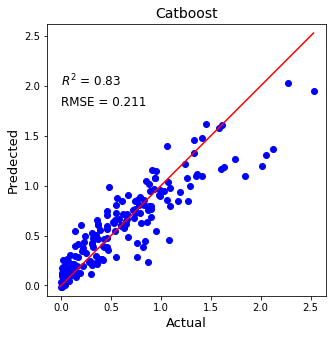

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.83', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)
plt.show()